# ▷ 바로가기 이동

### 1. [LMS Node Review](#8-2.-텍스트-감정분석의-유용성)

### 2. [Exploration Project 08. 영화리뷰 텍스트 감성분석하기](#exploration-project-08)

바로가기 기능은 local에서 동작

<hr>

## 8-2. 텍스트 감정분석의 유용성

오늘 우리는 딥러닝을 통해 텍스트에 담긴 감성을 분석(Sentimental Analysis)하는 방법을 배워 볼 것입니다. 

구체적으로는 IMDb나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 

긍정적인지 혹은 부정적인지를 분류(Classification) 할 수 있는 딥러닝 모델을 만들어 볼 것입니다.

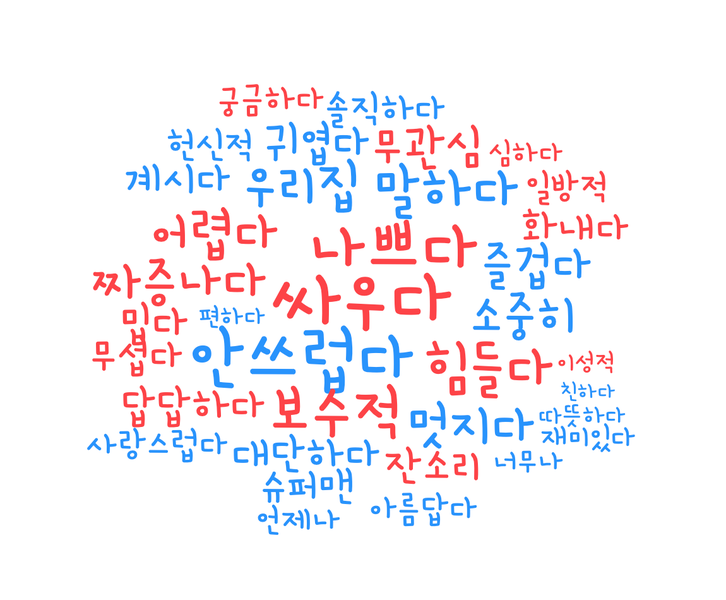
<br>[텍스트에 담긴 미묘한 어감의 차이를 기계가 이해할 수 있게 하려면 어떻게 해야 할까요?]

그런데 딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용할까요?

이 막연한 질문을 좀 더 세부적인 질문으로 잘게 쪼개면 다음과 같은 질문들로 나눠볼 수 있을 것입니다.

- 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?

- 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?

- 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?

- 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

이 질문들에 답을 제공하는 유용한 아티클 하나를 소개하겠습니다.

이 아티클을 정독하시면서 위 질문들에 대한 답을 찾아서 스스로 정리해 보시기 바랍니다.

하지만 정답이 있는 것은 아닙니다.

이 아티클을 통해 산업 현장에서 텍스트 분류가 실제로 활용되는 구체적인 사례도 확인할 수 있습니다.

- [동아비즈니스리뷰 감성분석 활용 사례 기고](https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine)

Q1. 텍스트 데이터에서만 얻을 수 있는 유용한 정보는 무엇인가요?<br>
그 유용성은 텍스트 데이터의 어떤 특징으로부터 비롯되는 것인가요?
~~~
SNS 등에서 광범위한 분량의 텍스트 데이터를 쉽게 얻을 수 있는데, 
이 데이터는 소비자들의 개인적, 감성적 반응이 직접 담겨 있을뿐더러
실시간 트렌드를 빠르게 반영하는 데이터이기도 하다.
~~~

Q2. 텍스트 감성분석 접근법을 크게 2가지로 나누면 무엇과 무엇이 있나요?

~~~
기계학습 기반 접근법과 감성사전 기반 접근법
~~~

Q3. 사전 기반의 감성분석이 기계학습 기반 접근법 대비 가지는 한계점을 2가지만 들어 주세요.

~~~
1.분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 가능성에 대응하기 어렵다.
2.단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다.
~~~

Q4. 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 도움을 줄 수 있나요?

~~~
일반적인 데이터분석 업무는 범주화가 잘 된 정형데이터를 필요로 하는데, 
이런 데이터를 큰 규모로 구축하기 위해서 많은 비용이 들지만, 
쉽게 구할 수 있는 비정형데이터인 텍스트에 감성분석 기법을 적용하면 
텍스트를 정형데이터로 가공하여 유용한 의사결정 보조자료로 활용할 수 있게 된다.
~~~

Q5. 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서<br>
정확도를 크게 향상시킬 수 있는 자연어처리 기법에는 무엇이 있나요?

~~~
단어의 특성을 저차원 벡터값으로 표현할 수 있는 워드 임베딩(word embedding) 기법
~~~



<hr>

## 8-3. 텍스트 데이터의 특징

인공지능 모델을 입력과 출력이 정해진 함수라고 생각해 봅시다. 

예를 들어 MNIST 숫자 분류기 모델이라면 이미지 파일을 읽어 들인 매트릭스가 입력이 되고, 

이미지 파일에 쓰여 있는 실제 숫자 값이 출력이 되는 함수가 될 것입니다.

이제 텍스트 문장을 입력으로 받아서 

그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 생각해 봅시다. 

이 모델을 만들기 위해서는 숫자 분류기를 만들 때는 생각할 필요가 없었던 2가지 문제가 생깁니다.

- 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?

- 텍스트에는 순서가 중요합니다. 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

<hr>

## 8-4. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법

인공지능 모델의 입력이 될 수 있는 것은

0과 1의 비트로 표현 가능한 숫자만으로 이루어진 매트릭스일 뿐입니다.

아주 단순히, A=0, B=1, ..., Z=25 라고 숫자를 임의로 부여한다고 해봅시다.

그러면 의미적으로 A와 B는 1만큼 멀고, A와 Z는 25만큼 멀까요? 그렇지 않습니다. 

텍스트의 중요한 특징은 그 자체로는 기호일 뿐이며, 

텍스트가 내포하는 의미를 기호가 직접 내포하지 않는다는 점입니다.

하지만 우리는 우선 단어 사전을 만들어 볼 수는 있습니다. 

우리가 사용하는 국어, 영어 사전에는 단어와 그 의미 설명이 짝지어져 있습니다.

우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것입니다. 그

런데 그 벡터는 어디서 가져올까요? 그렇습니다. 우리는 딥러닝을 통해 그 벡터를 만들어 낼 수 있습니다.

아래와 같이 단 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제를 생각해 보겠습니다.

> &nbsp; <br>
> i feel hungry <br>
> i eat lunch <br>
> now i feel happy <br>
> &nbsp; <br>

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


우리의 텍스트 데이터로부터 사전을 만들기 위해

모든 문장을 단어 단위로 쪼갠 후에 파이썬 딕셔너리(dict) 자료구조로 표현해 보겠습니다.

In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


단어 10개짜리 작은 딕셔너리가 만들어졌습니다. 

하지만 우리가 가진 텍스트 데이터를 숫자로 바꿔 보려고 하는데, 

텍스트를 숫자로 바꾸려면 위의 딕셔너리가 {텍스트:인덱스} 구조여야 합니다.

In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


이 딕셔너리는 단어를 주면 그 단어의 인덱스를 반환하는 방식으로 사용할 수 있습니다.



In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


이제 우리가 가진 텍스트 데이터를 숫자로 바꿔 표현해 봅시다.



In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


`get_encoded_sentence` 함수를 통해 아래와 같이 매핑된 것이 확인되시나요?

- \<BOS\> → 1

- i → 3

- eat → 6

- lunch → 7

In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


반대로, encode된 벡터를 decode하여 다시 원래 텍스트 데이터로 복구할 수도 있습니다.

In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


<hr>

## 8-5. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장

텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다. 

'i feel hungry'가 1, 3, 4, 5 로 변환되었지만

이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과합니다. 

우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다. 

그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 

이를 딥러닝을 통해 학습해서 최적화하게 됩니다. 

Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미 벡터 파라미터를 구현한 Embedding 레이어를 제공합니다.

> &nbsp; <br>
> ##### 임베딩(Embedding)이란? <br>
>자연어 처리(Natural Language Processing)분야에서 임베딩(Embedding)은<br>
> &nbsp;<br>
>사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자형태인 vector로 바꾼 결과 혹은 그 일련의 과정 전체를 의미한다.<br>
> &nbsp;<br>
>가장 간단한 형태의 임베딩은 단어의 빈도를 그대로 벡터로 사용하는 것이다.<br>
> &nbsp;<br>
>임베딩을 통해 할수있는 것은 단어나 문장 사이의 코사인 유사도가 가장 높은 단어를 구하는 등의 계산,<br>
> &nbsp;<br>
>단어들 사이의 의미/문법적 정보 도출 벡터 간 연산으로 단어 사이 문법적 관계 도출, <br>
> &nbsp;<br>
>전이 학습(transfer learning) 임베딩은 다른 딥러닝 모델의 입력값으로 자주 쓰이고, <br>
> &nbsp;<br>
>품질 좋은 임베딩을 쓸수록 모델의 성능이 좋아집니다.<br>
> &nbsp;<br>

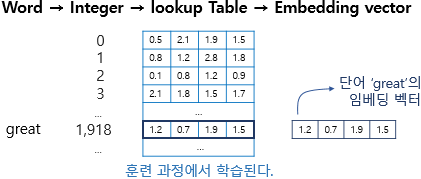
<br>[임베딩 레이어를 통해 word가 벡터화되는 과정]<br>[https://wikidocs.net/64779](https://wikidocs.net/64779)

위 그림에서 word_to_index('great')는 1918입니다. 

그러면 'great'라는 단어의 의미 공간상의 워드 벡터(word vector)는 

Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터가 됩니다. 

위 그림에서는 __1.2, 0.7, 1.9, 1.5__ 가 됩니다. 

Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현해 보겠습니다.

In [9]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

실행해 보니 에러가 발생합니다. 왜 그럴까요?

주의해야 할 점이 있습니다. 

Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다. 

raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.

Tensorflow에서는 `tf.keras.preprocessing.sequence.pad_sequences`라는 편리한 함수를 통해 

문장 벡터 뒤에 패딩(`<PAD>`)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

In [10]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다. `<PAD>` 가 0에 매핑되어 있다는 걸 기억하세요.

그러면 위에 시도했던 `output = embedding(raw_inputs)` 을 다시 시도해 봅시다.

In [11]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.01649432  0.0118288  -0.00438303 -0.04593201]
  [-0.0217513   0.00881783 -0.04646571 -0.01588447]
  [ 0.03354045 -0.02515687 -0.02263751  0.04721497]
  [ 0.03839505  0.0284806   0.02561985 -0.04582452]
  [-0.03578826 -0.02414416 -0.01660725 -0.01041447]]

 [[-0.01649432  0.0118288  -0.00438303 -0.04593201]
  [-0.0217513   0.00881783 -0.04646571 -0.01588447]
  [-0.00099086  0.0098269   0.02843053  0.0269944 ]
  [-0.02479764 -0.03430544 -0.00627779 -0.04216528]
  [-0.03578826 -0.02414416 -0.01660725 -0.01041447]]

 [[-0.01649432  0.0118288  -0.00438303 -0.04593201]
  [-0.04383767  0.01368331  0.01041217  0.00390825]
  [-0.0217513   0.00881783 -0.04646571 -0.01588447]
  [ 0.03354045 -0.02515687 -0.02263751  0.04721497]
  [ 0.00946854 -0.00483757 -0.00697547 -0.01478852]]], shape=(3, 5, 4), dtype=float32)


Q6. output의 shape=(3, 5, 4)에서 3, 5, 4의 의미는 각각 무엇일까요?

~~~
3은 입력문장 개수, 5는 입력문장의 최대 길이, 4는 워드 벡터의 차원 수
~~~

<hr>

## 8-6. 시퀀스 데이터를 다루는 RNN


텍스트 데이터를 다루는 데 주로 사용되는 딥러닝 모델은

바로 `Recurrent Neural Network(RNN)`입니다. 

RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있습니다.

텍스트 데이터도 시퀀스 데이터라는 관점으로 해석할 수 있습니다만, 

시퀀스 데이터의 정의에 가장 잘 어울리는 것은 음성 데이터가 아닐까 합니다. 

시퀀스 데이터란 바로 입력이 시간 축을 따라 발생하는 데이터입니다. 

예를 들어 이전 스텝의 'i feel hungry'라는 문장을 

누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음했다고 합시다.

> &nbsp; <br>
> at time=0s : 듣는이의 귀에 들어온 input='i'<br>
> &nbsp; <br>
> at time=1s : 듣는이의 귀에 들어온 input='feel'<br>
> &nbsp; <br>
> at time=2s : 듣는이의 귀에 들어온 input='hungry'<br>
> &nbsp; <br>

time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지입니다. 

그 다음에 'hungry'가 올지, 'happy'가 올지 알 수 없는 상황입니다. 

RNN은 그런 상황을 묘사하기에 가장 적당한 모델 구조를 가지고 있습니다. 

왜냐하면 RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 

현재 상태를 묘사하는 state machine으로 설계되었기 때문입니다.

State가 무엇인지 이해를 돕기 위해 다음 그림을 보면서 질문에 대답해 봅시다.

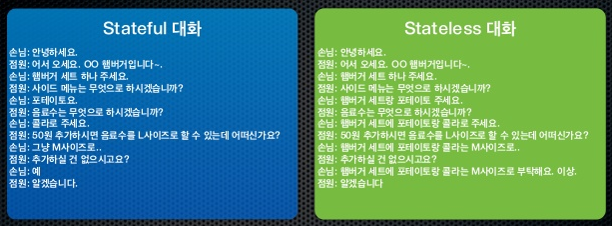
<br>[State가 유지된다는 것의 의미]<br>[https://www.slideshare.net/xguru/ss-16106464](https://www.slideshare.net/xguru/ss-16106464)

Q7. 위 그림에서 대화가 stateful한지 stateless한지 결정하는 것은 <br>
직원인가요, 아니면 손님인가요? 그렇게 생각하는 이유는 무엇인가요?

~~~
Stateful한 대화에서는 손님이 이전 시점에 어떤 선택을 했는지 직원이 기억을 하지만, 
Stateless한 대화에서는 직원이 기억하지 못한다. 
그래서 손님 스스로 본인이 이전 시점에 했던 선택을 모두 기억하고 있다가
직원에게 매번 새롭게 전달해야 한다.
손님의 이전 주문내역을 기억하는 직원은 stateful하고, 그렇지 못한 직원은 stateless하다.
~~~

다음 동영상을 통해 RNN의 기본 개념과 설계 구조를 좀 더 구체적으로 확인해 본 후 다음 질문에 대답해 봅시다.



- 김성훈 교수의 모두의 딥러닝 강좌 12강.RNN → [lec12- NN의 꽃 RNN 이야기.mkv]

Q8. RNN의 정의대로라면 t=4 시점의 state h4는 t=4 시점의 input x4와 t=3 시점의 state h3가 결정합니다. <br>
그렇다면 h4에는 t<4 이전의 입력 x1, x2, x3의 정보는 반영되지 않는 것일까요?

~~~
그렇지 않습니다. h4를 결정하는 이전 state h3 안에 x3의 정보가 반영되어 있고, 
같은 원리로 이전 시점의 모든 입력의 정보가 현재 상태에 반영될 수 있습니다.
~~~

그러면 RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현해 보겠습니다.

In [12]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


시퀀스 자료형과 RNN에 대해 조금더 쉽게 이해하고 싶다면 아래 링크(24분~55분)를 참고해주세요! 

- [시퀀스 자료형과 RNN](https://youtu.be/mG6N0ut9dog?t=1447) → [뛰어서 딥러닝 속으로 세미나 - 2회 RNN과 LSTM 그리고 전체 리뷰.mkv]

<hr>

## 8-7. 꼭 RNN이어야 할까?


텍스트를 처리하기 위해 RNN이 아니라 `1-D Convolution Neural Network(1-D CNN)`를 사용할 수도 있습니다.

우리는 이미지 분류기를 구현하면서 `2-D CNN`을 이미 사용해 본 바 있습니다. 

이미지는 시퀀스 데이터가 아닙니다. 

이미지 분류기 모델에는 이미지 전체가 한꺼번에 입력으로 사용됩니다.

그러므로 `1-D CNN`은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서

7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됩니다. 

이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여줍니다.

그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점이 있습니다.

In [13]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

아주 간단히는 `GlobalMaxPooling1D()` 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다. 

이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 

그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데, 의외로 성능이 잘 나올 수도 있습니다.

In [14]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나, FFN(FeedForward Network) 레이어만으로 구성하거나, 

혹은 최근 각광받고 있는 Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있습니다. 

조금더 깊게 알고 싶다면 [여기](https://wikidocs.net/80437)를 참고 하세요.

<hr>

## 8-8. IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석


이제 본격적으로 IMDb 영화리뷰 감성분석 태스크에 도전해 보겠습니다. 

IMDb Large Movie Dataset은 50000개의 영어로 작성된 영화 리뷰 텍스트로 구성되어 있으며, 

긍정은 1, 부정은 0의 라벨이 달려 있습니다. 

2011년 [Learning Word Vectors for Sentiment Analysis](https://www.aclweb.org/anthology/P11-1015.pdf) 논문에서 이 데이터셋을 소개하였습니다.

50000개의 리뷰 중 절반인 25000개가 훈련용 데이터, 

나머지 25000개를 테스트용 데이터로 사용하도록 지정되어 있습니다. 

이 데이터셋은 tensorflow Keras 데이터셋 안에 포함되어 있어서 손쉽게 다운로드하여 사용할 수 있습니다.

이후 스텝의 IMDb 데이터셋 처리 코드 중 일부는

Tensorflow 튜토리얼에 언급된 데이터 전처리 로직을 참고하였음을 밝힙니다.

In [15]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

17473536/17464789 [==============================] - 0s 0us/step
훈련 샘플 개수: 25000, 테스트 개수: 25000


`imdb.load_data()` 호출 시 단어사전에 등재할 단어의 개수(`num_words`)를 10000으로 지정하면, 

그 개수만큼의 `word_to_index` 딕셔너리까지 생성된 형태로 데이터셋이 생성됩니다.

다운로드한 데이터 실제 예시를 확인해 보겠습니다.

In [16]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


텍스트 데이터가 아니라 이미 숫자로 encode된 텍스트 데이터를 다운로드했음을 확인할 수 있습니다.

이미 텍스트가 encode되었으므로 IMDb 데이터셋에는 encode에 사용한 딕셔너리까지 함께 제공합니다.

In [17]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

1654784/1641221 [==============================] - 0s 0us/step
the
1


IMDb 데이터셋의 텍스트 인코딩을 위한 `word_to_index`, `index_to_word`는 아래와 같이 보정되어야 합니다. 

아래 내용은 Tensorflow 튜토리얼의 가이드를 반영하여 작성하였습니다.

`word_to_index`는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬되어 있습니다.

In [18]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


다운로드한 데이터셋이 확인되었습니다. 

마지막으로, encode된 텍스트가 정상적으로 decode 되는지 확인해 보겠습니다.

In [19]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

decode 한 문장과 라벨을 비교하여 일치하는지 확인해 주세요.

<hr>

`pad_sequences`를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.

문장 최대 길이 `maxlen`의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다. 

이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.

In [20]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


위의 경우에는 `maxlen=580` 이 됩니다.

또 한 가지 유의해야 하는 것은 padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중

어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다는 점입니다.

두 가지 방식을 한 번씩 다 적용해서 RNN을 학습시켜 보면서 그 결과를 비교해 보시기 바랍니다.

In [21]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


Q9. RNN 활용 시 pad_sequences의 padding 방식은 'post'와 'pre' 중 어느 것이 유리할까요? 그 이유는 무엇일까요?

~~~
RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 
그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 
따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다.
~~~

<hr>

## 8-9. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련


RNN 모델을 직접 설계해 보겠습니다. 이전 스텝의 실습 내용을 참고해 주세요.



In [22]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
# [[YOUR CODE]]
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


(참고)우리가 사용할 수 있는 모델에는 RNN만 있는 것이 아닙니다. 이전 스텝에서 구현해 본 다양한 모델들이 전부 사용 가능합니다.



model 훈련 전에, 훈련용 데이터셋 25000건 중 10000건을 분리하여 검증셋(validation set)으로 사용하도록 합니다. 

적절한 validation 데이터는 몇 개가 좋을지 고민해 봅시다.

In [23]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


model 학습을 시작해 봅시다.

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 13ms/step - loss: 0.6914 - accuracy: 0.5074 - val_loss: 0.6876 - val_accuracy: 0.6302
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.7291 - val_loss: 0.6747 - val_accuracy: 0.7047
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.6617 - accuracy: 0.7430 - val_loss: 0.6514 - val_accuracy: 0.7315
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.7688 - val_loss: 0.6172 - val_accuracy: 0.7648
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5861 - accuracy: 0.8082 - val_loss: 0.5753 - val_accuracy: 0.7879
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.8375 - val_loss: 0.5301 - val_accuracy: 0.8071
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4803 - accuracy: 0.8530 - val_loss: 0.4860 - val_accuracy: 0.8206
Epoch 8/20
30/30 [=

학습이 끝난 모델을 테스트셋으로 평가해 봅니다.



In [25]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 1s - loss: 0.3676 - accuracy: 0.8386
[0.36756351590156555, 0.8385999798774719]


`model.fit()` 과정 중의 train/validation loss, accuracy 등이 매 epoch마다 history 변수에 저장되어 있습니다.

이 데이터를 그래프로 그려 보면, 수행했던 딥러닝 학습이 잘 진행되었는지, 

오버피팅 혹은 언더피팅하지 않았는지, 성능을 개선할 수 있는 다양한 아이디어를 얻을 수 있는 좋은 자료가 됩니다.

In [26]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


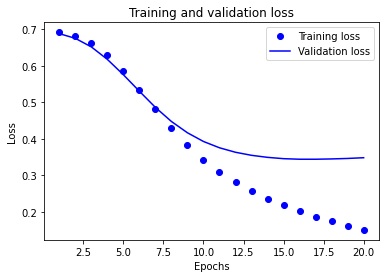

In [27]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and validation loss를 그려 보면, 몇 epoch까지의 트레이닝이 적절한지 최적점을 추정해 볼 수 있습니다. 

validation loss의 그래프가 train loss와의 이격이 발생하게 되면 더 이상의 트레이닝은 무의미해지게 마련입니다.

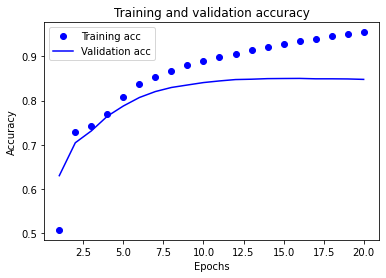

In [28]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

마찬가지로 Training and validation accuracy를 그려 보아도 유사한 인사이트를 얻을 수 있습니다.

<hr>

## 8-10. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용


이전 스텝에서 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 

정확도를 크게 향상시킬 수 있는 자연어처리 기법으로 

단어의 특성을 저차원 벡터값으로 표현할 수 있는 `워드 임베딩(word embedding)` 기법이 있다는 언급을 한 바 있습니다.

우리는 이미 이전 스텝에서 워드 임베딩을 사용했습니다. 

사용했던 model의 첫 번째 레이어는 바로 Embedding 레이어였습니다. 

이 레이어는 우리가 가진 사전의 단어 개수 X 워드 벡터 사이즈만큼의 크기를 가진 학습 파라미터였습니다. 

만약 우리의 감성 분류 모델이 학습이 잘 되었다면, 

Embedding 레이어에 학습된 우리의 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것입니다. 한번 확인해 봅시다.

이번 스텝부터 워드 벡터 파일을 저장할 디렉터리를 먼저 생성합시다. 

그리고 워드 벡터를 다루는데 유용한 `gensim` 패키지 버전 확인을 합니다.

그리고 word2vec 이론은 아래 내용을 참고 하세요!

- [word2vec 이론](https://www.youtube.com/watch?v=sY4YyacSsLc&t=126s)

- 여기서부터 사용할 gensim 은 pypi 에서 윈도우용 패키지 선택하여 다운 받은 뒤에 whl 설치로 진행함.

~~~
        !pip install .\gensim-4.2.0-cp310-cp310-win_amd64.whl
~~~

In [29]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [30]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
# word2vec_file_path = "/content/drive/MyDrive/Colab Notebooks/EXP_08/sentiment_classification/data/word2vec.txt"

f = open(word2vec_file_path, 'w', encoding="utf-8")
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

`gensim`에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용할 수 있습니다.


In [31]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.03751283, -0.02161935, -0.0118762 , -0.02975251, -0.0328015 ,
       -0.03702403, -0.03640583, -0.02826172, -0.03242511, -0.02090744,
       -0.0320996 , -0.03493228, -0.02062987, -0.02923925,  0.03661289,
       -0.03487822], dtype=float32)

위와 같이 얻은 워드 벡터를 가지고 재미있는 실험을 해볼 수 있습니다. 

워드 벡터가 의미 벡터 공간상에 유의미하게 학습되었는지 확인하는 방법 중에, 

단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하는 방법이 있습니다. 

`gensim`을 사용하면 아래와 같이 해볼 수 있습니다.

In [32]:
word_vectors.similar_by_word("love")

[('performances', 0.9877437949180603),
 ('edge', 0.9823352694511414),
 ('historic', 0.973548173904419),
 ('rooms', 0.9721398949623108),
 ('marion', 0.9686763882637024),
 ('bombed', 0.9686009883880615),
 ('overs', 0.96559739112854),
 ('1946', 0.9617518186569214),
 ('collector', 0.961441159248352),
 ('icons', 0.9594230651855469)]

어떻습니까? love라는 단어와 유사한 다른 단어를 그리 잘 찾았다고 느껴지지는 않습니다. 

감성 분류 태스크를 잠깐 학습한 것만으로 워드 벡터가 유의미하게 학습되기는 어려운 것 같습니다. 

우리가 다룬 정도의 훈련 데이터로는 워드 벡터를 정교하게 학습시키기 어렵습니다.

그래서 이번에는 구글에서 제공하는 `Word2Vec`이라는 

사전학습된(Pretrained) 워드 임베딩 모델을 가져다 활용해 보겠습니다. 

Word2Vec은 무려 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습되었습니다. 

총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것입니다. 

Word2Vec이 학습되는 원리에 대해서는 차후 깊이 있게 다루게 될 것입니다. 

하지만 그렇게 해서 학습된 Word2Vec이라는 것도 실은 방금 우리가 파일에 써본 Embedding Layer와 원리는 동일합니다.

임베딩의 개념에 대해 아주 잘 정리된 책 `한국어 임베딩`의 서론에서

왜 사전학습된 임베딩을 활용하는 것이 유리한지 설명해 주고 있습니다. 

바로 전이학습 때문입니다. 관련 내용을 읽어본 후 질문에 답해 봅시다.

- [한국어 임베딩 서문](https://ratsgo.github.io/natural%20language%20processing/2019/09/12/embedding/)

Q10. 사전에 학습된 Word2Vec 등의 임베딩 모델을 활용하는 전이학습(Transfer Learning)이 유리한 이유를 설명해 보세요.

~~~
사람도 무언가를 배우기 위해 제로베이스에서 시작하지 않고 자신이 지닌 이전의 경험과 지식을 동원하는 것처럼, 
광범위한 데이터를 통해 미리 학습해 놓은 임베딩 속에 녹아 있는 의미, 문법 등의 부가적인 정보를
내가 만들려는 모델이 활용할 수 있는 피처로 활용하는 것이 훨씬 빠르고 정확하게 학습할 수 있는 방법이 된다.
~~~

그러면 본격적으로 Google의 Word2Vec 모델을 가져와 적용해 봅시다.

In [33]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

300dim의 벡터로 이루어진 300만 개의 단어입니다. 

이 단어 사전을 메모리에 모두 로딩하면 아주 높은 확률로 여러분의 실습환경에 메모리 에러가 날 것입니다. 

그래서 `KeyedVectors.load_word2vec_format` 메서드로

워드 벡터를 로딩할 때 가장 많이 사용되는 상위 100만 개만 `limit`으로 조건을 주어 로딩했습니다.

메모리가 충분하다면 `limit=None`으로 하시면 300만 개를 모두 로딩합니다.

In [34]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

어떻습니까? Word2Vec에서 제공하는 워드 임베딩 벡터들끼리는 

의미적 유사도가 가까운 것이 서로 가깝게 제대로 학습된 것을 확인할 수 있습니다. 

이제 우리는 이전 스텝에서 학습했던 모델의 임베딩 레이어를 

Word2Vec의 것으로 교체하여 다시 학습시켜 볼 것입니다.

In [35]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [36]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [37]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

# CPU만 사용하려면:
# with tf.device('/cpu:0'):
history = model.fit(partial_x_train,
                partial_y_train,
                epochs=epochs,
                batch_size=512,
                validation_data=(x_val, y_val),
                verbose=1)

Epoch 1/20
30/30 [==============================] - 6s 89ms/step - loss: 0.6934 - accuracy: 0.5287 - val_loss: 0.6847 - val_accuracy: 0.5571
Epoch 2/20
30/30 [==============================] - 2s 71ms/step - loss: 0.6650 - accuracy: 0.6025 - val_loss: 0.6496 - val_accuracy: 0.6339
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.5651 - accuracy: 0.7287 - val_loss: 0.4955 - val_accuracy: 0.7827
Epoch 4/20
30/30 [==============================] - 2s 71ms/step - loss: 0.3704 - accuracy: 0.8493 - val_loss: 0.3700 - val_accuracy: 0.8335
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2452 - accuracy: 0.9051 - val_loss: 0.3321 - val_accuracy: 0.8572
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1738 - accuracy: 0.9393 - val_loss: 0.3075 - val_accuracy: 0.8707
Epoch 7/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1209 - accuracy: 0.9663 - val_loss: 0.3158 - val_accuracy: 0.8711
Epoch 8/20
30

In [38]:
# 테스트셋을 통한 모델 평가
# with tf.device('/cpu:0'):
results = model.evaluate(x_test, y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.4917 - accuracy: 0.8615
[0.4916516840457916, 0.8614799976348877]


어떻습니까? Word2Vec을 정상적으로 잘 활용하면 그렇지 않은 경우보다 5% 이상의 성능 향상이 발생합니다. 

적절한 모델 구성, 하이퍼파라미터를 고려하여 감정 분석 모델의 성능을 최대한으로 끌어올려 봅시다.

# ▲ 여기까지 LMS 학습노드의 내용 정리와 실험 내용들

<hr>

## Exploration Project 08

### Analyzing movie review text sentiment

## 8-11. 프로젝트 : 네이버 영화리뷰 감성분석 도전하기


이전 스텝까지는 영문 텍스트의 감정 분석을 진행해 보았습니다. 

그렇다면 이번에는 한국어 텍스트의 감정 분석을 진행해 보면 어떨까요? 

오늘 활용할 데이터셋은 네이버 영화의 댓글을 모아 구성된 [Naver sentiment movie corpus](https://github.com/e9t/nsmc)입니다.

라이브러리 버전을 확인해 봅니다

<hr>

사용할 라이브러리 버전을 둘러봅시다.



In [39]:
import pandas
import konlpy
import gensim

import os
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

import tensorflow as tf
import matplotlib.pyplot as plt

from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
from tensorflow.keras.initializers import Constant

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


#### 1) 데이터 준비와 확인

<hr>

In [40]:
import pandas as pd

# 데이터를 읽어봅시다. 
# train_data = pd.read_table('./sentiment_classification/data/ratings_train.txt')
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
# test_data = pd.read_table('./sentiment_classification/data/ratings_test.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### 2) 데이터로더 구성

<hr>

실습 때 다루었던 IMDB 데이터셋은 텍스트를 가공하여 imdb.data_loader() 메서드를 호출하면 

숫자 인덱스로 변환된 텍스트와 word_to_index 딕셔너리까지 친절하게 제공합니다. 

그러나 이번에 다루게 될 nsmc 데이터셋은 전혀 가공되지 않은 텍스트 파일로 이루어져 있습니다. 

이것을 읽어서 imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작합니다. 

data_loader 안에서는 다음을 수행해야 합니다.

- 데이터의 중복 제거

- NaN 결측치 제거

- 한국어 토크나이저로 토큰화

- 불용어(Stopwords) 제거

- 사전word_to_index 구성

- 텍스트 스트링을 사전 인덱스 스트링으로 변환

- X_train, y_train, X_test, y_test, word_to_index 리턴

우선 데이터의 내용을 확인해 보자.

In [41]:
train_data.tail()

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [43]:
test_data.tail()

,id,document,label
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0
49999,6070594,마무리는 또 왜이래,0


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


train, test 셋 모두 타입은 비슷하게 이루어져 있다.

데이터의 중복 제거, NaN 결측치 제거 등을 수행해야 한다고 과제안에 포함되어 있으므로

우선 내용을 확인해 보자.

In [45]:
## 중복값 확인 - Train

print("train_data 전체 :", train_data.shape)
print("train_data 중복 :", train_data[train_data['document'].duplicated()].shape)
print("train_data 중복제거후 예상 :", train_data[~train_data['document'].duplicated()].shape)

train_data 전체 : (150000, 3)
train_data 중복 : (3817, 3)
train_data 중복제거후 예상 : (146183, 3)


In [46]:
## 중복값 확인 - Test

print("test_data 전체 :", test_data.shape)
print("test_data 중복 :", test_data[test_data['document'].duplicated()].shape)
print("test_data 중복제거후 예상 :", test_data[~test_data['document'].duplicated()].shape)

test_data 전체 : (50000, 3)
test_data 중복 : (842, 3)
test_data 중복제거후 예상 : (49158, 3)


이게 있을까 싶었는데 내용은 생각보다 비슷한 데이터가 많다.

짧은 내용으로 이루어진 글자들이 아닐까 싶다.

In [47]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

우선 중복 데이터들을 먼저 삭제 한다.

삭제후 예상 값 대로 정리가 됐을 것이다.

In [48]:
## 결측값 확인 - Train

print("train_data 전체 :", train_data.shape)
print("train_data 결측 :", train_data[train_data['document'].isnull()].shape)
print("train_data 결측제거후 예상 :", train_data[~train_data['document'].isnull()].shape)

train_data 전체 : (146183, 3)
train_data 결측 : (1, 3)
train_data 결측제거후 예상 : (146182, 3)


In [49]:
## 결측값 확인 - Test

print("test_data 전체 :", test_data.shape)
print("test_data 결측 :", test_data[test_data['document'].isnull()].shape)
print("test_data 결측제거후 예상 :", test_data[~test_data['document'].isnull()].shape)

test_data 전체 : (49158, 3)
test_data 결측 : (1, 3)
test_data 결측제거후 예상 : (49157, 3)


결측값은 많지 않지만 있긴 하다.

미리 삭제하도록 하자.

In [50]:
# NaN 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any') 
test_data = test_data.dropna(how = 'any') 

한번 더 확인 해 보자.

In [51]:
pd.isnull(train_data).sum()

id          0
document    0
label       0
dtype: int64

In [52]:
pd.isnull(test_data).sum()

id          0
document    0
label       0
dtype: int64

이제 결측값은 없는 것으로 보인다.

텍스트 내용을 전처리 하는 부분도 넣도록 하겠다.

영문자와 비슷하게 한글도 적당한 정규표현식을 사용하여 전처리를 해 보겠다.

이전에 『작사가 인공지능 만들기』 프로젝트에서 사용했던 방법을 적용하겠다.

In [53]:
## 간단하게 텍스트 전처리…
import re
def hangul_pre_proc(content):
    content = content.strip()    ## strip() : 인자는 제거할 문자 지정. 지정 하지 않은 기본값은 문자열의 선행 후행 공백 제거
    content = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", content)    ## 한글과 공백을 제외하고 모두 제거
    content = content.strip()
    content = re.sub(r"^ +", "", content)    ## 1칸 초과하는 공백 제거 (첫번째 공백은 유지, 이어서 두번째 부터 공백 나타나면 제거)
    content = content.strip()
    return content

테스트는 아래와 같은 방법을 통해, 결과를 예상 해 볼 수 있다.

In [54]:
hangul_pre_proc("아@!? 더빙......진짜         짜증나네요 목소리")

'아 더빙진짜 짜증나네요 목소리'

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146182 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146182 non-null  int64 
 1   document  146182 non-null  object
 2   label     146182 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


정규표현식을 적용하려면 str 타입이어야 한다는 메시지가 나와서,

우선은 document 컬럼의 Dtype을 object 에서 str 로 변경해주고,

맵핑을 통해서 정규표현식을 적용해 주도록 하겠다.

In [56]:
## 정규표현식을 사용하려면 object 타입이 아니라 str 타입이어야 한다.
train_data["document"] = train_data["document"].apply(str)
test_data["document"] = test_data["document"].apply(str)

## 간단한 전처리 － 내용에서 우리말 글자만 남기고 나머지 삭제
train_data["document"] = train_data["document"].map(lambda x: hangul_pre_proc(x))
test_data["document"] = test_data["document"].map(lambda x: hangul_pre_proc(x))

혹시 이러한 전처리 과정에서 공백 문자로만 채워진 행들이 생겼을 수 있으니,

이것들을 NaN 으로 치환해주는 과정 이후에 결측치 확인을 다시 수행하겠다.

In [58]:
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [59]:
test_data['document'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())

id            0
document    305
label         0
dtype: int64


내용이 없는 자료가 다시 생겼다.

내용 없으니 라벨이 뭐던간에 의미가 없어졌으니 삭제하겠다.

In [61]:
# Null 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any') 
test_data = test_data.dropna(how = 'any') 

값이 삭제가 잘 확인해보자. 뭐 잘 됐을테지만 말이다.

In [62]:
print("train_data.isnull().sum()")
print(train_data.isnull().sum())
print("━" * 64)
print("test_data.isnull().sum()")
print(test_data.isnull().sum())

train_data.isnull().sum()
id          0
document    0
label       0
dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
test_data.isnull().sum()
id          0
document    0
label       0
dtype: int64


데이터셋의 전처리를 수행한 결과는 다음과 같다.

In [63]:
print("train_data 전체 :", train_data.shape)
print("test_data 전체 :", test_data.shape)

train_data 전체 : (145393, 3)
test_data 전체 : (48852, 3)


train 15만건, test 5만건 의 자료가 살짝 줄어들었다.

load_data 함수는 학습노드의 내용을 참고하여, 적용하도록 하겠다.

대부분은 전반부 실습과정에서 설명이 잘 나와있고, 정리가 잘 되어있는 함수이다.

In [64]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

## Mecab 가 토큰화. (한글 토크나이저)
tokenizer = Mecab()

## 불용어
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    
    # id 는 필요가 없으니 drop 한다.
    train_data = train_data.drop(labels="id", axis=1)
    test_data = test_data.drop(labels="id", axis=1)

    # drop_duplicates메서드는 내용이 중복되는 행을 제거하는 메서드입니다.
    train_data.drop_duplicates(subset=['document'], inplace=True)
    test_data.drop_duplicates(subset=['document'], inplace=True)
    
    ## 결측치 (NaN) 제거
    train_data = train_data.dropna(how = 'any') 
    test_data = test_data.dropna(how = 'any') 
    
    ## 한국어 토크나이저로 토큰화
    ## 불용어(Stopwords) 제거
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    ## 사전word_to_index 구성
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    
    ## 텍스트 스트링을 사전 인덱스 스트링으로 변환 하는 함수
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
    
    ## 텍스트 스트링을 사전 인덱스 스트링으로 변환
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
    
    ## X_train, y_train, X_test, y_test, word_to_index 리턴
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

딕셔너리도 형식에 큰 차이가 없어서, 학습노드의 내용을 가져다 사용한다

In [65]:
## 딕셔너리. {텍스트：인덱스}  구조로 이루어져 있다.
index_to_word = {index:word for word, index in word_to_index.items()}

변환 함수도 학습노드의 내용을 재사용 한다.

In [66]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

위의 함수를 테스트 삼아 사용해 보자.

In [67]:
get_decoded_sentence(X_train[0], index_to_word)

'더 빙 진짜 짜증 나 네요 목소리'

In [68]:
get_decoded_sentence(X_train[1], index_to_word)

'포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나'

#### 3) 모델 구성을 위한 데이터 분석 및 가공

<hr>

 - 데이터셋 내 문장 길이 분포

 - 적절한 최대 문장 길이 지정
 
 - keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

훈련 샘플이 얼마나 되는지 확인 해 보자.

In [69]:
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(X_train), len(X_test)))      ## 내용
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(y_train), len(y_test)))      ## 라벨

훈련 샘플 개수: 143461, 테스트 개수: 48342
훈련 샘플 개수: 143461, 테스트 개수: 48342


In [70]:
print(X_train[0])  # 1번째 리뷰데이터
print(X_train[1])  # 2번째 리뷰데이터
print('1번째 리뷰 문장 라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('2번째 리뷰 문장 라벨: ', y_train[1])  # 2번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(X_train[0]))
print('2번째 리뷰 문장 길이: ', len(X_train[1]))

[27, 67, 891, 33, 214, 15, 28, 698]
[999, 480, 491, 636, 4, 110, 1552, 47, 862, 947, 11, 38, 364]
1번째 리뷰 문장 라벨:  0
2번째 리뷰 문장 라벨:  1
1번째 리뷰 문장 길이:  8
2번째 리뷰 문장 길이:  13


사전의 내용을 조금 살펴보자

In [71]:
sorted(word_to_index.items(), key = lambda item: item[1])

[('', 3),
 ('영화', 4),
 ('다', 5),
 ('고', 6),
 ('하', 7),
 ('을', 8),
 ('보', 9),
 ('게', 10),
 ('지', 11),
 ('있', 12),
 ('없', 13),
 ('좋', 14),
 ('나', 15),
 ('었', 16),
 ('만', 17),
 ('는데', 18),
 ('너무', 19),
 ('봤', 20),
 ('적', 21),
 ('안', 22),
 ('정말', 23),
 ('로', 24),
 ('것', 25),
 ('음', 26),
 ('아', 27),
 ('네요', 28),
 ('어', 29),
 ('지만', 30),
 ('같', 31),
 ('재밌', 32),
 ('진짜', 33),
 ('에서', 34),
 ('했', 35),
 ('기', 36),
 ('네', 37),
 ('않', 38),
 ('거', 39),
 ('점', 40),
 ('았', 41),
 ('수', 42),
 ('되', 43),
 ('면', 44),
 ('ㅋㅋ', 45),
 ('인', 46),
 ('연기', 47),
 ('말', 48),
 ('주', 49),
 ('내', 50),
 ('평점', 51),
 ('최고', 52),
 ('이런', 53),
 ('던', 54),
 ('어요', 55),
 ('할', 56),
 ('왜', 57),
 ('겠', 58),
 ('스토리', 59),
 ('ㅋㅋㅋ', 60),
 ('해', 61),
 ('습니다', 62),
 ('듯', 63),
 ('아니', 64),
 ('생각', 65),
 ('드라마', 66),
 ('더', 67),
 ('그', 68),
 ('사람', 69),
 ('싶', 70),
 ('때', 71),
 ('감동', 72),
 ('배우', 73),
 ('함', 74),
 ('본', 75),
 ('까지', 76),
 ('알', 77),
 ('만들', 78),
 ('내용', 79),
 ('뭐', 80),
 ('볼', 81),
 ('보다', 82),
 ('감독', 83),
 ('

숫자 인덱스가 3 부터 시작한다.

사전의 특정 내용을 출력해보자

In [72]:
index_to_word = {index:word for word, index in word_to_index.items()}
# print(index_to_word[0])                          ## 인덱스 오류 발생
# print(index_to_word[1])                          ## 인덱스 오류 발생
# print(index_to_word[2])                          ## 인덱스 오류 발생
print("index_to_word[3] :", index_to_word[3])      ## "" 출력
print("index_to_word[4] :", index_to_word[4])      ## "영화" 출력
print("index_to_word[5] :", index_to_word[5])      ## "다" 출력
print(word_to_index['영화'])                       ##  4 가 출력

index_to_word[3] : 
index_to_word[4] : 영화
index_to_word[5] : 다
4


사용할 태그를 지정해 줄 필요가 있다.

아래의 내용을 적용하도록 하겠다.

In [73]:
# 데이터셋의 텍스트 인코딩을 위한 word_to_index, index_to_word는 아래와 같이 보정되어야 합니다
# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

변경된 사전의 내용을 살펴보자

In [74]:
print(len(word_to_index))
sorted(word_to_index.items(), key = lambda item: item[1])

10001


[('<PAD>', 0),
 ('<BOS>', 1),
 ('<UNK>', 2),
 ('', 3),
 ('<UNUSED>', 3),
 ('영화', 4),
 ('다', 5),
 ('고', 6),
 ('하', 7),
 ('을', 8),
 ('보', 9),
 ('게', 10),
 ('지', 11),
 ('있', 12),
 ('없', 13),
 ('좋', 14),
 ('나', 15),
 ('었', 16),
 ('만', 17),
 ('는데', 18),
 ('너무', 19),
 ('봤', 20),
 ('적', 21),
 ('안', 22),
 ('정말', 23),
 ('로', 24),
 ('것', 25),
 ('음', 26),
 ('아', 27),
 ('네요', 28),
 ('어', 29),
 ('지만', 30),
 ('같', 31),
 ('재밌', 32),
 ('진짜', 33),
 ('에서', 34),
 ('했', 35),
 ('기', 36),
 ('네', 37),
 ('않', 38),
 ('거', 39),
 ('점', 40),
 ('았', 41),
 ('수', 42),
 ('되', 43),
 ('면', 44),
 ('ㅋㅋ', 45),
 ('인', 46),
 ('연기', 47),
 ('말', 48),
 ('주', 49),
 ('내', 50),
 ('평점', 51),
 ('최고', 52),
 ('이런', 53),
 ('던', 54),
 ('어요', 55),
 ('할', 56),
 ('왜', 57),
 ('겠', 58),
 ('스토리', 59),
 ('ㅋㅋㅋ', 60),
 ('해', 61),
 ('습니다', 62),
 ('듯', 63),
 ('아니', 64),
 ('생각', 65),
 ('드라마', 66),
 ('더', 67),
 ('그', 68),
 ('사람', 69),
 ('싶', 70),
 ('때', 71),
 ('감동', 72),
 ('배우', 73),
 ('함', 74),
 ('본', 75),
 ('까지', 76),
 ('알', 77),
 ('만들', 78),
 ('

키 : "" 의 값이 3 을 갖는것을 볼 수 있다. \<UNUSED\> 와 애매한 상황이므로 삭제하도록 하자.

In [76]:
print(word_to_index.pop("", "이미 삭제함"))     ## 다시 실행하면 두번째 매개변수가 반환되어 출력될 뿐 별 일은 일어나지 않을 것이다.
print(len(word_to_index))

3
10000


변경된 내용을 출력해보자

In [77]:
print("index_to_word[0] :", index_to_word[0])      ## <PAD>
print("index_to_word[1] :", index_to_word[1])      ## <BOS>
print("index_to_word[2] :", index_to_word[2])      ## <UNK>
print("index_to_word[3] :", index_to_word[3])      ## <UNUSED>
print("index_to_word[4] :", index_to_word[4])      ## "영화" 출력
print("index_to_word[5] :", index_to_word[5])      ## "다" 출력
print(word_to_index['영화'])                       ##  4 가 출력

index_to_word[0] : <PAD>
index_to_word[1] : <BOS>
index_to_word[2] : <UNK>
index_to_word[3] : <UNUSED>
index_to_word[4] : 영화
index_to_word[5] : 다
4


이정도면 정리가 된 것 같다.

다음은 encode된 텍스트가 정상적으로 decode 되는지 확인 하겠다.

In [78]:
print(get_decoded_sentence(X_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print()
print(get_decoded_sentence(X_train[1], index_to_word))
print('라벨: ', y_train[1])  # 2번째 리뷰데이터의 라벨
print()
print(get_decoded_sentence(X_train[4], index_to_word))
print('라벨: ', y_train[4])  # 5번째 리뷰데이터의 라벨
print()
print(get_decoded_sentence(X_train[7], index_to_word))
print('라벨: ', y_train[7])  # 8번째 리뷰데이터의 라벨

더 빙 진짜 짜증 나 네요 목소리
라벨:  0

포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나
라벨:  1

익살 스런 연기 돋보였 던 영화 스파이더맨 에서 늙 어 보이 기 만 했 던 <UNUSED> <UNUSED> 너무나 이뻐 보였 다
라벨:  1

반개 아깝 다 욕 나온다 <UNUSED> <UNUSED> 연기 생활 몇 년 인지 정말 발 로 해도 그것 보단 낫 겟 다 납치 감금 만 반복 반복 드라마 가족 없 다 연기 못 하 사람 만 <UNUSED> 네
라벨:  0


decode 한 문장과 라벨을 비교하여 일치하는지 확인해보자

In [79]:
train_data.loc[[0,1,4,7],:]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0


문장과 라벨이 잘 맞아 떨어진다.

이제 pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일 하는 과정을 수행하겠다.

문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치므로,

이 길이의 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋다고 한다.

이하의 코드도 노드 전반부 실습 과정의 내용을 참고하여 재사용 하도록 하겠다.

In [82]:
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {:.2f}%가 maxlen 설정값 이내에 포함됩니다. '
      .format((np.sum(num_tokens < max_tokens) / len(num_tokens))*100))

문장길이 평균 :  13.940199058408888
문장길이 최대 :  83
문장길이 표준편차 :  11.454722594381662
pad_sequences maxlen :  36
전체 문장의 93.28%가 maxlen 설정값 이내에 포함됩니다. 


문장 최대 길이 제한은 권장 수치라 생각되는 maxlen=36 로 지정하고,

padding 방식은 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라

RNN을 이용한 딥러닝 적용 시 성능 차이가 발생하는데, 

RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 된다.

그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적이라는 내용도,

실습과정에서 이미 확인한 내용이다.

내용에 따르면, 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이므로,

여기서도 padding="pre" 를 지정하도록 하겠다.

In [84]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(
    X_train, value=word_to_index["<PAD>"], padding="pre", maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    X_test, value=word_to_index["<PAD>"], padding="pre", maxlen=maxlen)

print("pad_sequences 후 X_train.shape :", X_train.shape)
print("pad_sequences 후 X_test.shape :", X_test.shape)

pad_sequences 후 X_train.shape : (143461, 36)
pad_sequences 후 X_test.shape : (48342, 36)


#### 4) 모델 구성 및 validation set 구성

<hr>

모델은 3가지 이상 다양하게 구성하여 실험해 보세요.

model 훈련 전에, 훈련용 데이터셋 중 일부를 분리하여, 검증셋(validation set)으로 사용하도록 하자.

적절한 validation 데이터는 몇 개가 좋을지, 생각해보면 학습 결과에 끼칠 영향은 크지 않을 것이다.

일반적으로 사용하는 8:2 비율을 따라서, 그정도 비율로 분리하여 구성하도록 하겠다.

In [85]:
# 20％ 를 계산.
len(X_train) // 5

28692

28692 개를 validation 데이터로 사용하겠다.

In [87]:
# validation set 20％ 분리
part_X_val = X_train[:(len(X_train) // 5)]   
part_y_val = y_train[:(len(X_train) // 5)]

# validation set을 제외한 나머지 80％
part_X_train = X_train[(len(X_train) // 5):]  
part_y_train = y_train[(len(X_train) // 5):]

print("part_X_train.shape :", part_X_train.shape)
print("part_y_train.shape :", part_y_train.shape)
print("part_X_val.shape :", part_X_val.shape)
print("part_y_val.shape :", part_y_val.shape)

part_X_train.shape : (114769, 36)
part_y_train.shape : (114769,)
part_X_val.shape : (28692, 36)
part_y_val.shape : (28692,)


이제 모델을 여러개 설계하겠다.

모델의 기본 형식도, 실습 과정에서 사용했던 구성을 가져오도록 하겠다.

변경 부분은 과정 도중에 표기해 놓도록 하겠다.

In [89]:
vocab_size = len(word_to_index)    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [90]:
print(vocab_size)

10000


첫번째로는, RNN 모델을 준비했다.

텍스트 데이터를 다루는 데 주로 사용되는 딥러닝 모델은 Recurrent Neural Network(RNN) 인데,

이 RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있다.

In [92]:
## 1. RNN Model
RNN_model = tf.keras.Sequential()
RNN_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
RNN_model.add(tf.keras.layers.GlobalMaxPooling1D())
RNN_model.add(tf.keras.layers.Dense(8, activation='relu'))
RNN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
RNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


두번째로 준비한 모델은, 1D-CNN 모델이다.

1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서,

7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용한다.

이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여준다.

그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점이 있다.

In [94]:
## 2. 1-D Convolution Neural Network(1-D CNN)
CNN_model = tf.keras.Sequential()
CNN_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
CNN_model.add(tf.keras.layers.Conv1D(16, 6, activation='relu'))
CNN_model.add(tf.keras.layers.MaxPooling1D(5))
CNN_model.add(tf.keras.layers.Conv1D(16, 6, activation='relu'))
CNN_model.add(tf.keras.layers.GlobalMaxPooling1D())
CNN_model.add(tf.keras.layers.Dense(8, activation='relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

세번째로 준비한 모델은 간단히 GlobalMaxPooling1D() 레이어 하나를 사용하는 모델이다.

이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여

그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데,

의외로 성능이 잘 나올 수도 있다. 이니셜을 따서, 모델 이름을 GMP_model 로 썼다.

In [96]:
## 3. GlobalMaxPooling1D() 레이어 하나만 사용
GMP_model = tf.keras.Sequential()
GMP_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
GMP_model.add(tf.keras.layers.GlobalMaxPooling1D())
GMP_model.add(tf.keras.layers.Dense(8, activation='relu'))
GMP_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
GMP_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


그 밖에 아는 모델이 없긴 한데, 지난 EXP_Node.06 에서의 LSTM(RNN) 도 언어모델이므로,

생각난김에, 추가적으로 네번째 모델로 사용 해 보도록 하겠다.

In [98]:
## 4. LSTM
LSTM_model = tf.keras.Sequential()
LSTM_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
LSTM_model.add(tf.keras.layers.LSTM(128, dropout=0.2))
LSTM_model.add(tf.keras.layers.Dense(8, activation='relu'))
LSTM_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
LSTM_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 235,281
Trainable params: 235,281
Non-trainable params: 0
_________________________________________________________________


#### 5) 모델 훈련 개시

<hr>


모델 컴파일 시에 사용할 파라메터들은 아래와 같이 지정하도록 하겠다.

 - optimizer 는 EXP_Node.06 에서도 다루어졌던 adam 을 사용하겠다.<br>
 (Adam은 현재 가장 많이 사용하는 옵티마이저이다.)<br>
 이전 노드에서, 나중에 자세히 다룬다고 했던것 같은데,<br>
 아직 다루진 않고 있다ㅡ 아무튼, 잘 몰라도 일단 사용하도록 하자.

 - loss 는 binary_crossentropy 를 사용 할 것이다.<br>
    EXP_Node.06 에서는 SparseCategoricalCrossentropy<br>
    (훈련 데이터의 라벨이 정수의 형태로 제공될 때 사용하는 손실함수.)를 사용 했었는데,<br>
    여기서의 결과는 긍정댓글인지 부정댓글인지만 확인하는 0 , 1 두개의 라벨이므로,<br>
    binary_crossentropy 를 사용하는 것이 타당하다.

 - metrics 는 accuracy 지정 하겠다.<br>
 evaluate 에서는 대체로 정확도 메트릭을 사용한다.<br>공식문서상에서도 공인된 내용이다.

준비한 4개의 모델을 컴파일 하겠다.

그리고 학습반복횟수와 배치사이즈도 지정을 미리 해 두었다.

In [99]:
RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
GMP_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 8    ## epoch 는 8회 정도만 진행하겠다.
batch_size = 256    ## batch_size 

준비된 4개의 모델들을 각각 학습 하도록 하겠다.

학습 과정에서 validation_data 를 지정하고, 학습 결과 history 를 받아놓는다.

앞서 컴파일시에 지정한 metrics=['accuracy'] 에 따라, 일반적으로 학습 상태 정보가 담겨질 것이다.

학습 후에는 바로 evaluate를 진행하여 테스트 정확도를 바로 확인하도록 출력을 하는 구성이다.

In [100]:
RNN_hist = RNN_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

RNN_result = RNN_model.evaluate(X_test, y_test, verbose=2)
print(RNN_result)

Epoch 1/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5407 - accuracy: 0.7419 - val_loss: 0.3937 - val_accuracy: 0.8248
Epoch 2/8
449/449 [==============================] - 2s 4ms/step - loss: 0.3618 - accuracy: 0.8434 - val_loss: 0.3621 - val_accuracy: 0.8372
Epoch 3/8
449/449 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8645 - val_loss: 0.3600 - val_accuracy: 0.8399
Epoch 4/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2944 - accuracy: 0.8771 - val_loss: 0.3659 - val_accuracy: 0.8402
Epoch 5/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2745 - accuracy: 0.8877 - val_loss: 0.3740 - val_accuracy: 0.8403
Epoch 6/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2578 - accuracy: 0.8953 - val_loss: 0.3852 - val_accuracy: 0.8399
Epoch 7/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2435 - accuracy: 0.9023 - val_loss: 0.3981 - val_accuracy: 0.8374
Epoch 8/8
449

In [101]:
CNN_hist = CNN_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

CNN_result = CNN_model.evaluate(X_test, y_test, verbose=2)
print(CNN_result)

Epoch 1/8
449/449 [==============================] - 3s 5ms/step - loss: 0.4793 - accuracy: 0.7556 - val_loss: 0.3774 - val_accuracy: 0.8285
Epoch 2/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3490 - accuracy: 0.8466 - val_loss: 0.3720 - val_accuracy: 0.8312
Epoch 3/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3121 - accuracy: 0.8659 - val_loss: 0.3750 - val_accuracy: 0.8323
Epoch 4/8
449/449 [==============================] - 2s 5ms/step - loss: 0.2755 - accuracy: 0.8855 - val_loss: 0.3902 - val_accuracy: 0.8297
Epoch 5/8
449/449 [==============================] - 2s 5ms/step - loss: 0.2363 - accuracy: 0.9037 - val_loss: 0.4221 - val_accuracy: 0.8272
Epoch 6/8
449/449 [==============================] - 2s 5ms/step - loss: 0.1985 - accuracy: 0.9221 - val_loss: 0.4689 - val_accuracy: 0.8169
Epoch 7/8
449/449 [==============================] - 2s 5ms/step - loss: 0.1658 - accuracy: 0.9367 - val_loss: 0.5154 - val_accuracy: 0.8148
Epoch 8/8
449

In [102]:
GMP_hist = GMP_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

GMP_result = GMP_model.evaluate(X_test, y_test, verbose=2)
print(GMP_result)

Epoch 1/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5338 - accuracy: 0.7484 - val_loss: 0.3886 - val_accuracy: 0.8231
Epoch 2/8
449/449 [==============================] - 2s 4ms/step - loss: 0.3605 - accuracy: 0.8443 - val_loss: 0.3617 - val_accuracy: 0.8384
Epoch 3/8
449/449 [==============================] - 2s 4ms/step - loss: 0.3200 - accuracy: 0.8648 - val_loss: 0.3597 - val_accuracy: 0.8405
Epoch 4/8
449/449 [==============================] - 2s 3ms/step - loss: 0.2940 - accuracy: 0.8771 - val_loss: 0.3647 - val_accuracy: 0.8419
Epoch 5/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2740 - accuracy: 0.8876 - val_loss: 0.3733 - val_accuracy: 0.8402
Epoch 6/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2572 - accuracy: 0.8959 - val_loss: 0.3835 - val_accuracy: 0.8403
Epoch 7/8
449/449 [==============================] - 2s 4ms/step - loss: 0.2427 - accuracy: 0.9025 - val_loss: 0.3951 - val_accuracy: 0.8364
Epoch 8/8
449

In [103]:
LSTM_hist = LSTM_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

LSTM_result = LSTM_model.evaluate(X_test, y_test, verbose=2)
print(LSTM_result)

Epoch 1/8
449/449 [==============================] - 5s 7ms/step - loss: 0.4520 - accuracy: 0.7838 - val_loss: 0.3597 - val_accuracy: 0.8433
Epoch 2/8
449/449 [==============================] - 3s 6ms/step - loss: 0.3510 - accuracy: 0.8482 - val_loss: 0.3569 - val_accuracy: 0.8426
Epoch 3/8
449/449 [==============================] - 3s 6ms/step - loss: 0.3336 - accuracy: 0.8585 - val_loss: 0.3611 - val_accuracy: 0.8401
Epoch 4/8
449/449 [==============================] - 3s 6ms/step - loss: 0.3248 - accuracy: 0.8623 - val_loss: 0.3519 - val_accuracy: 0.8449
Epoch 5/8
449/449 [==============================] - 3s 6ms/step - loss: 0.3142 - accuracy: 0.8675 - val_loss: 0.3543 - val_accuracy: 0.8454
Epoch 6/8
449/449 [==============================] - 3s 6ms/step - loss: 0.3033 - accuracy: 0.8723 - val_loss: 0.3613 - val_accuracy: 0.8440
Epoch 7/8
449/449 [==============================] - 3s 6ms/step - loss: 0.2886 - accuracy: 0.8791 - val_loss: 0.3492 - val_accuracy: 0.8472
Epoch 8/8
449

- RNN : 83.06％<br>
- CNN : 81.35％<br>
- GMP : 83.05％<br>
- LSTM : 84.50％

결과를 확인할 수 있었다.

LSTM 은 큰 기대를 안했었다. 아무래도 실습과정에서 사용되지 않았던 모델이라

다른 모델 대비 살짝 성능이 떨어지지 않을까 생각했었다.

#### 6) Loss, Accuracy 그래프 시각화

<hr>

학습이 어떻게 이루어졌는지, 시각화를 통해 살펴보자.

hist_plot 함수는 예전 노드에서 정의 하고 사용했던것을 가져와서 재사용한다.

왼쪽에는 Accuracy 를, 오른쪽에는 Loss 를 출력하도록 구성했다.

In [104]:
def hist_plot(history:tf.keras.callbacks.History()):

    tacc = history.history["accuracy"]
    vacc = history.history["val_accuracy"]

    tloss=history.history["loss"]
    vloss=history.history["val_loss"]

    epochs_range = range(epochs)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, tacc, label="Training Accuracy")
    plt.plot(epochs_range, vacc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, tloss, label="Training Loss")
    plt.plot(epochs_range, vloss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")
    
    plt.show()

- 첫번째 모델 : RNN

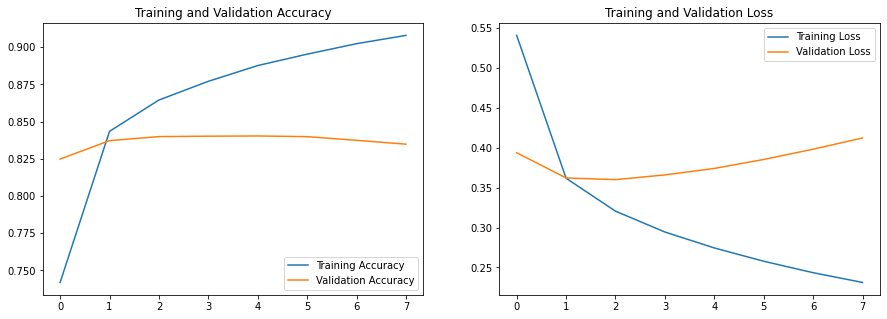

In [105]:
hist_plot(RNN_hist)

- 두번째 모델：1D-CNN

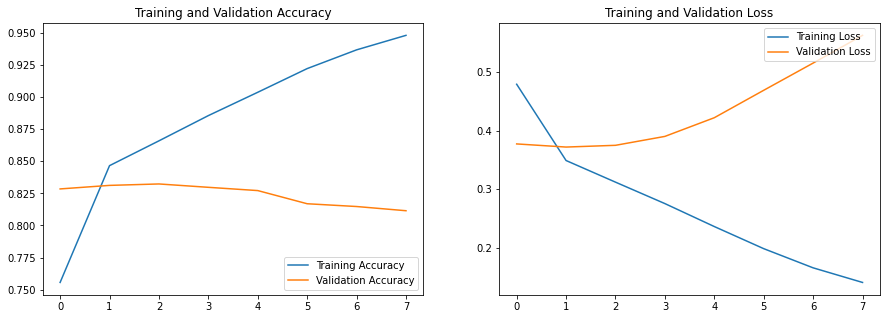

In [106]:
hist_plot(CNN_hist)

- 세번째 모델：GMP

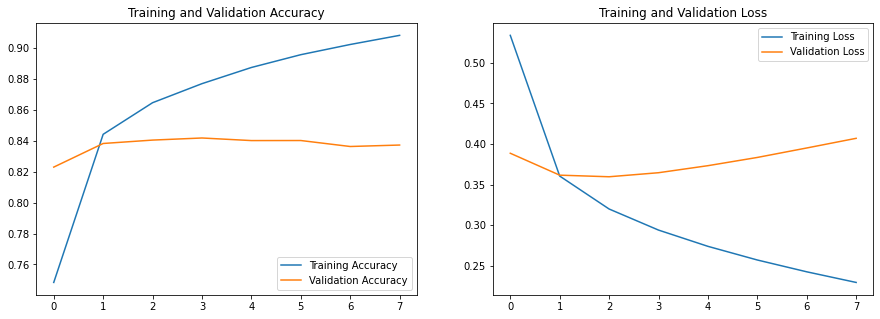

In [107]:
hist_plot(GMP_hist)

- 네번째 모델：LSTM

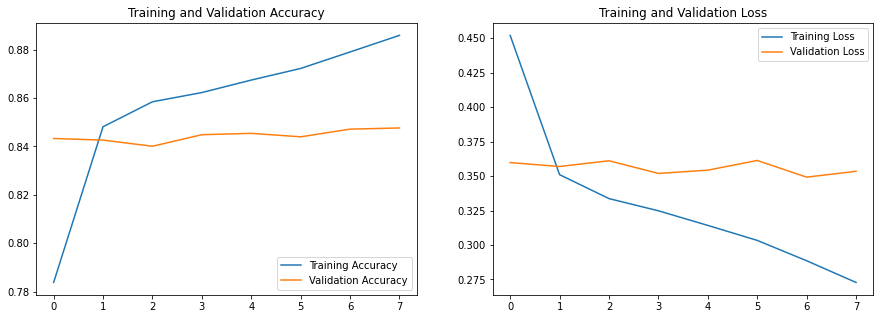

In [108]:
hist_plot(LSTM_hist)

그래프의 상태를 보아하니 네개의 모델 모두, 학습을 반복 하나마나한 상황임을 파악할 수 있다.

#### 7) 학습된 Embedding 레이어 분석

<hr>


- 이전 스텝에서 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법으로 단어의 특성을 저차원 벡터값으로 표현할 수 있는 `워드 임베딩(word embedding)` 기법이 있다는 언급을 한 바 있습니다.

- 우리는 이미 이전 스텝에서 워드 임베딩을 사용했습니다. 사용했던 model의 첫 번째 레이어는 바로 Embedding 레이어였습니다. 이 레이어는 우리가 가진 사전의 단어 개수 X 워드 벡터 사이즈만큼의 크기를 가진 학습 파라미터였습니다. 만약 우리의 감성 분류 모델이 학습이 잘 되었다면, Embedding 레이어에 학습된 우리의 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것입니다. 한번 확인해 봅시다.

In [110]:
## 사용했던 모델의 첫번째 레이어 : 임베딩 레이어 (단어개수×워드벡터사이즈 크기의 학습 파라미터)
embedding_layer = RNN_model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


이전에 여러개의 모델을 사용해서 각각의 결과를 확인 했었다.

임베딩 레이어는 동일한 형식을 사용했긴 하지만,

혹시 차이가 있을까 싶어서 따로 테스트 해보겠다.

우선 RNN 부터 확인해보겠다.

In [111]:
## 사용했던 모델의 첫번째 레이어 : 임베딩 레이어 (단어개수×워드벡터사이즈 크기의 학습 파라미터)
embedding_layer = RNN_model.layers[0]

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME') + '/aiffel/sentiment_classification/data/word2vec_rnn.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = embedding_layer.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [112]:
## gensim에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용할 수 있다.
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['영화']
vector

array([-0.11314357, -0.22849204, -0.21037394, -0.10424811, -0.1399861 ,
       -0.18801229, -0.04425119, -0.13909926, -0.17391942, -0.17615491,
       -0.09048958, -0.12398524, -0.24786569, -0.02745851, -0.21964815,
       -0.1403214 ], dtype=float32)

위와 같이 얻은 워드 벡터를 가지고 재미있는 실험을 해볼 수 있습니다.

워드 벡터가 의미 벡터 공간상에 유의미하게 학습되었는지 확인하는 방법 중에,

단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하는 방법이 있습니다.

gensim을 사용하면 아래와 같이 해볼 수 있습니다.

In [114]:
word_vectors.similar_by_word("실망")

[('꺼지', 0.9133641123771667),
 ('저거', 0.8995476961135864),
 ('별로', 0.8656827807426453),
 ('도무지', 0.8595550656318665),
 ('쉽', 0.8470942974090576),
 ('제정신', 0.8439092040061951),
 ('징징', 0.8390306830406189),
 ('생활', 0.8297951817512512),
 ('고기', 0.8285660743713379),
 ('꺼라', 0.8264790773391724)]

이번엔 LSTM 차례다.

In [115]:
## 사용했던 모델의 첫번째 레이어 : 임베딩 레이어 (단어개수×워드벡터사이즈 크기의 학습 파라미터)
embedding_layer = LSTM_model.layers[0]

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME') + '/aiffel/sentiment_classification/data/word2vec_lstm.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = embedding_layer.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [116]:
word_vectors.similar_by_word("실망")

[('꺼지', 0.9133641123771667),
 ('저거', 0.8995476961135864),
 ('별로', 0.8656827807426453),
 ('도무지', 0.8595550656318665),
 ('쉽', 0.8470942974090576),
 ('제정신', 0.8439092040061951),
 ('징징', 0.8390306830406189),
 ('생활', 0.8297951817512512),
 ('고기', 0.8285660743713379),
 ('꺼라', 0.8264790773391724)]

소숫점 까지 일치한다.

임베딩 레이어의 내용이 동일함을 확인할 수 있으므로, 다른 모델들은 굳이 볼 필요 없을 것 같다.

#### 8) 한국어 Word2Vec 임베딩 활용하여 성능 개선

<hr>

- 한국어 Word2Vec은 /data 폴더 안에 있는 word2vec_ko.model을 활용하세요.

- 한국어 Word2Vec을 활용할 때는 load_word2vec_format() 형태가 아닌 load() 형태로 모델을 불러와주세요.<br> 
또한 모델을 활용할 때에는 아래 예시와 같이 .wv를 붙여서 활용합니다.<br>
좀더 자세한 활용법에 대해선 다음 링크들을 참조해주세요. [참고 링크1](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#storing-and-loading-models), [참고 링크2](https://radimrehurek.com/gensim/models/keyedvectors.html)

In [117]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
word2vec_file_path = os.getenv('HOME') + '/aiffel/sentiment_classification/data/word2vec_ko.model'
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv["끝"]

In [118]:
word_vectors.wv.similar_by_word("실망")

[('당황', 0.8200313448905945),
 ('당혹', 0.8075222373008728),
 ('곤혹', 0.771090030670166),
 ('낙담', 0.7601173520088196),
 ('분개', 0.7536212205886841),
 ('경악', 0.7477779984474182),
 ('뻔뻔', 0.7368745803833008),
 ('격분', 0.733599066734314),
 ('감탄', 0.7275494337081909),
 ('분노', 0.7243137955665588)]

오! 

의미적으로 상당히 유사한 단어들을 보니, 상당히 만족스럽다.

이것이 사전 훈련된 모델의 위력인가...

그러면 이제 기존의 모델들의 임베딩 레이어를 Word2Vec_ko 로 교체하여 다시 학습시켜보자.

In [119]:
## embedding_matrix 는 이전의 사용했던
## 모델의 첫번째 레이어 
## 임베딩 레이어 (단어개수×워드벡터사이즈 크기의 학습 파라미터) 의 크기로
## 우선 사이즈를 맞추어 무작위 값을 할당한다.
print("vocab_size : ", vocab_size)
print("word_vectors.wv.vectors.shape :", word_vectors.wv.vectors.shape)    ## Word2Vec_ko 의 Shape 를 확인
print("word_vectors.wv.vectors.shape[1] :", word_vectors.wv.vectors.shape[1])

vocab_size = vocab_size    ## 어휘사전의 크기
word_vector_dim = word_vectors.wv.vectors.shape[1]    ## 워드 벡터의 차원 수

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)
print("embedding_matrix.shape :", embedding_matrix.shape)

vocab_size :  10000
word_vectors.wv.vectors.shape : (302960, 100)
word_vectors.wv.vectors.shape[1] : 100
embedding_matrix.shape : (10000, 100)


In [120]:
# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4, vocab_size):
    if index_to_word[i] in word_vectors.wv:
        embedding_matrix[i] = word_vectors.wv[index_to_word[i]]

In [121]:
maxlen

36

이전에 준비했던 4개의 모델들의 임베딩 레이어를 W2V_ko 사용하는 레이어로 교체하도록 하겠다.

변경하여 새로 설계하는 모델들 앞에는 접두어로 W2V 를 붙이도록 하겠다.

In [122]:
## 1. RNN Model
W2V_RNN_model = tf.keras.Sequential()
W2V_RNN_model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
    input_length=maxlen,
    trainable=True))    # trainable을 True로 주면 Fine-tuning
W2V_RNN_model.add(tf.keras.layers.GlobalMaxPooling1D())
W2V_RNN_model.add(tf.keras.layers.Dense(8, activation='relu'))
W2V_RNN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
W2V_RNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 36, 100)           1000000   
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 808       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 1,000,817
Trainable params: 1,000,817
Non-trainable params: 0
_________________________________________________________________


In [124]:
## 2. 1-D Convolution Neural Network(1-D CNN)
W2V_CNN_model = tf.keras.Sequential()
W2V_CNN_model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
    input_length=maxlen,
    trainable=True))    # trainable을 True로 주면 Fine-tuning
W2V_CNN_model.add(tf.keras.layers.Conv1D(16, 6, activation='relu'))
W2V_CNN_model.add(tf.keras.layers.MaxPooling1D(5))
W2V_CNN_model.add(tf.keras.layers.Conv1D(16, 6, activation='relu'))
W2V_CNN_model.add(tf.keras.layers.GlobalMaxPooling1D())
W2V_CNN_model.add(tf.keras.layers.Dense(8, activation='relu'))
W2V_CNN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
W2V_CNN_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 36, 100)           1000000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 31, 16)            9616      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 16)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 16)             1552      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [126]:
## 3. GlobalMaxPooling1D() 레이어 하나만 사용
W2V_GMP_model = tf.keras.Sequential()
W2V_GMP_model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
    input_length=maxlen,
    trainable=True))    # trainable을 True로 주면 Fine-tuning
W2V_GMP_model.add(tf.keras.layers.GlobalMaxPooling1D())
W2V_GMP_model.add(tf.keras.layers.Dense(8, activation='relu'))
W2V_GMP_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
W2V_GMP_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 36, 100)           1000000   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 808       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 1,000,817
Trainable params: 1,000,817
Non-trainable params: 0
_________________________________________________________________


In [127]:
## 4. LSTM
W2V_LSTM_model = tf.keras.Sequential()
W2V_LSTM_model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
    input_length=maxlen,
    trainable=True))    # trainable을 True로 주면 Fine-tuning
W2V_LSTM_model.add(tf.keras.layers.LSTM(128, dropout=0.2))
W2V_LSTM_model.add(tf.keras.layers.Dense(8, activation='relu'))
W2V_LSTM_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
W2V_LSTM_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 36, 100)           1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 1,118,289
Trainable params: 1,118,289
Non-trainable params: 0
_________________________________________________________________


모델 컴파일은 이전과 동일하게 진행하겠다.

훈련 반복 횟수와 배치사이즈도 동일하게 지정하여 진행하겠다.

__한국어 Word2Vec 임베딩을 활용한 성능 개선을 확인하고자,__

우선적으로 임베딩 레이어를 제외하고 다른 설정은 동일하게 적용하도록 하겠다.

In [128]:
W2V_RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
W2V_CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
W2V_GMP_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
W2V_LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 8    ## epoch 는 8회 정도만 진행하겠다.
batch_size = 256    ## batch_size 

우선 학습노드 내용상에 한국어 Word2Vec 임베딩 적용만으로 5％ 이상의 향상이 있을 거라 했었는데,

기존 모델과 동일한 조건에서 훈련과 평가를 수행해 보고자 한다.

앞선 W2V 적용 전 모델의 경우 evaluate 결과, 아래의 정확도를 달성했다.

- RNN : 83.06％<br>
- CNN : 81.35％<br>
- GMP : 83.05％<br>
- LSTM : 84.50％

루브릭 목표는 85％ 이상이다.

한국어 Word2Vec 임베딩 적용을 통해 5％ 이상의 성능향상을 이루어낸다면

4개의 모델 모두 정확도 85％를 초과 달성이 가능할 것이다.

이전의 실험과 같은 방법으로 학습을 수행하도록 하겠다.

다만 다른 점은 학습 기록이나 평가 결과에서도 모두 별도의 변수이름을 지정하도록 하였다.

마찬가지로 접두어 W2V 로 시작하는 이름이다.

In [129]:
W2V_RNN_hist = W2V_RNN_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

W2V_RNN_result = W2V_RNN_model.evaluate(X_test, y_test, verbose=2)
print(W2V_RNN_result)

Epoch 1/8
449/449 [==============================] - 2s 4ms/step - loss: 0.7451 - accuracy: 0.5821 - val_loss: 0.6405 - val_accuracy: 0.6350
Epoch 2/8
449/449 [==============================] - 2s 4ms/step - loss: 0.6107 - accuracy: 0.6650 - val_loss: 0.5845 - val_accuracy: 0.6892
Epoch 3/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5658 - accuracy: 0.7053 - val_loss: 0.5489 - val_accuracy: 0.7203
Epoch 4/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5334 - accuracy: 0.7321 - val_loss: 0.5227 - val_accuracy: 0.7387
Epoch 5/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7516 - val_loss: 0.5057 - val_accuracy: 0.7464
Epoch 6/8
449/449 [==============================] - 2s 4ms/step - loss: 0.4834 - accuracy: 0.7668 - val_loss: 0.4953 - val_accuracy: 0.7596
Epoch 7/8
449/449 [==============================] - 2s 4ms/step - loss: 0.4661 - accuracy: 0.7781 - val_loss: 0.4740 - val_accuracy: 0.7729
Epoch 8/8
449

In [130]:
W2V_CNN_hist = W2V_CNN_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

W2V_CNN_result = W2V_CNN_model.evaluate(X_test, y_test, verbose=2)
print(W2V_CNN_result)

Epoch 1/8
449/449 [==============================] - 3s 6ms/step - loss: 0.5785 - accuracy: 0.6826 - val_loss: 0.4812 - val_accuracy: 0.7676
Epoch 2/8
449/449 [==============================] - 2s 5ms/step - loss: 0.4416 - accuracy: 0.7936 - val_loss: 0.4217 - val_accuracy: 0.8046
Epoch 3/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3873 - accuracy: 0.8247 - val_loss: 0.3953 - val_accuracy: 0.8181
Epoch 4/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3535 - accuracy: 0.8432 - val_loss: 0.3893 - val_accuracy: 0.8239
Epoch 5/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3304 - accuracy: 0.8561 - val_loss: 0.4042 - val_accuracy: 0.8194
Epoch 6/8
449/449 [==============================] - 2s 5ms/step - loss: 0.3120 - accuracy: 0.8659 - val_loss: 0.3840 - val_accuracy: 0.8294
Epoch 7/8
449/449 [==============================] - 2s 5ms/step - loss: 0.2944 - accuracy: 0.8754 - val_loss: 0.3874 - val_accuracy: 0.8298
Epoch 8/8
449

In [131]:
W2V_GMP_hist = W2V_GMP_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

W2V_GMP_result = W2V_GMP_model.evaluate(X_test, y_test, verbose=2)
print(W2V_GMP_result)

Epoch 1/8
449/449 [==============================] - 2s 4ms/step - loss: 0.7086 - accuracy: 0.5714 - val_loss: 0.6272 - val_accuracy: 0.6533
Epoch 2/8
449/449 [==============================] - 2s 4ms/step - loss: 0.6033 - accuracy: 0.6743 - val_loss: 0.5760 - val_accuracy: 0.6997
Epoch 3/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5616 - accuracy: 0.7113 - val_loss: 0.5423 - val_accuracy: 0.7253
Epoch 4/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5277 - accuracy: 0.7364 - val_loss: 0.5155 - val_accuracy: 0.7433
Epoch 5/8
449/449 [==============================] - 2s 4ms/step - loss: 0.5005 - accuracy: 0.7556 - val_loss: 0.5089 - val_accuracy: 0.7513
Epoch 6/8
449/449 [==============================] - 2s 4ms/step - loss: 0.4786 - accuracy: 0.7701 - val_loss: 0.4799 - val_accuracy: 0.7682
Epoch 7/8
449/449 [==============================] - 2s 4ms/step - loss: 0.4605 - accuracy: 0.7815 - val_loss: 0.4683 - val_accuracy: 0.7778
Epoch 8/8
449

In [132]:
W2V_LSTM_hist = W2V_LSTM_model.fit(
    part_X_train, part_y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(part_X_val, part_y_val), verbose=1)

W2V_LSTM_result = W2V_LSTM_model.evaluate(X_test, y_test, verbose=2)
print(W2V_LSTM_result)

Epoch 1/8
449/449 [==============================] - 5s 8ms/step - loss: 0.4895 - accuracy: 0.7580 - val_loss: 0.3917 - val_accuracy: 0.8211
Epoch 2/8
449/449 [==============================] - 3s 7ms/step - loss: 0.3818 - accuracy: 0.8272 - val_loss: 0.3469 - val_accuracy: 0.8470
Epoch 3/8
449/449 [==============================] - 3s 7ms/step - loss: 0.3422 - accuracy: 0.8481 - val_loss: 0.3312 - val_accuracy: 0.8541
Epoch 4/8
449/449 [==============================] - 3s 7ms/step - loss: 0.3183 - accuracy: 0.8606 - val_loss: 0.3283 - val_accuracy: 0.8579
Epoch 5/8
449/449 [==============================] - 3s 7ms/step - loss: 0.2996 - accuracy: 0.8705 - val_loss: 0.3263 - val_accuracy: 0.8588
Epoch 6/8
449/449 [==============================] - 3s 7ms/step - loss: 0.2839 - accuracy: 0.8773 - val_loss: 0.3252 - val_accuracy: 0.8620
Epoch 7/8
449/449 [==============================] - 3s 7ms/step - loss: 0.2722 - accuracy: 0.8833 - val_loss: 0.3323 - val_accuracy: 0.8584
Epoch 8/8
449

- W2V_RNN : 77.66％<br>
- W2V_CNN : 82.22％<br>
- W2V_GMP : 77.75％<br>
- W2V_LSTM : 85.81％

을 달성한 것을 확인할 수 있다.

CNN, LSTM 말고는, 떨어졌는데…？

문제가 있는지 확인해 보자.

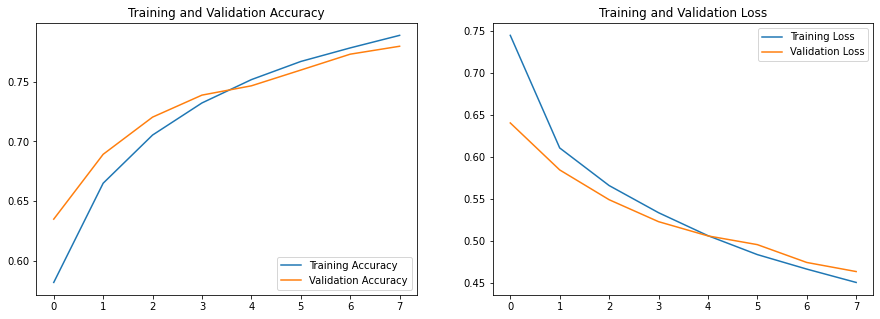

In [133]:
hist_plot(W2V_RNN_hist)

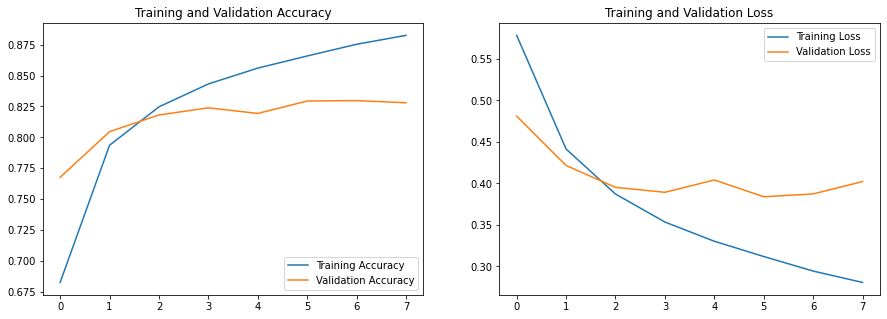

In [134]:
hist_plot(W2V_CNN_hist)

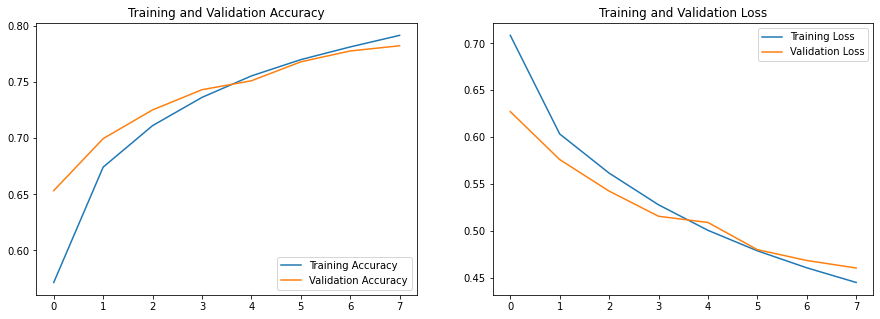

In [135]:
hist_plot(W2V_GMP_hist)

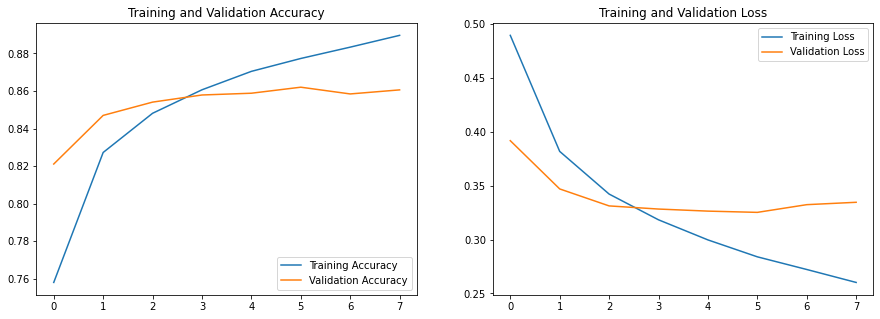

In [136]:
hist_plot(W2V_LSTM_hist)

준비한 4개의 모델 모두 임베딩 레이어에 Word2Vec_ko 모델을 적용 한 결과

이전에 2번째 epoch 시점부터 train / valid loss 간에 크나큰 이격이 발생하여 과적합이 예상되던 것과 달리,

지금은 어느정도 그래프가 따라가는 것 같다.


그러면 W2V 적용 전 후의 차이를 비교해 보자.

hist_plot2 는 이전의 his_plot 함수에서

loss 그래프가 그려지는 부분을, W2V 적용 모델의 Accuracy 로 출력하도록 변경하였다.

In [137]:
def hist_plot2(history_na:tf.keras.callbacks.History(), history_w2v:tf.keras.callbacks.History()):

    tacca = history_na.history["accuracy"]
    vacca = history_na.history["val_accuracy"]

    taccb=history_w2v.history["accuracy"]
    vaccab=history_w2v.history["val_accuracy"]

    epochs_range = range(epochs)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, tacca, label="Training Accuracy")
    plt.plot(epochs_range, vacca, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, taccb, label="Training Accuracy")
    plt.plot(epochs_range, vaccab, label="Validation Accuracy")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss - w2v")
    
    plt.show()

좌측이 이전의 그래프, 우측은 W2V 적용한 후의 그래프이다

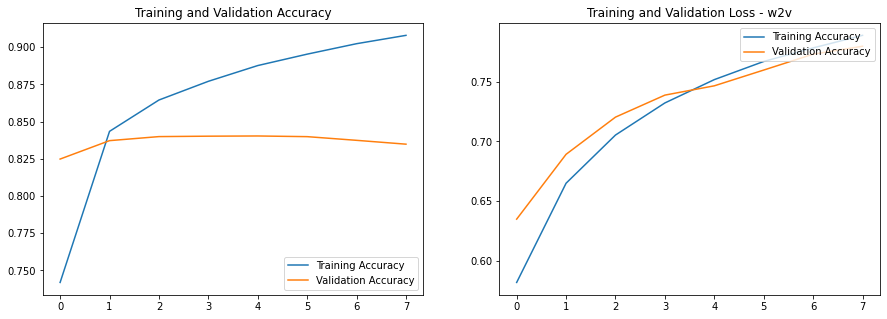

In [138]:
hist_plot2(RNN_hist, W2V_RNN_hist)

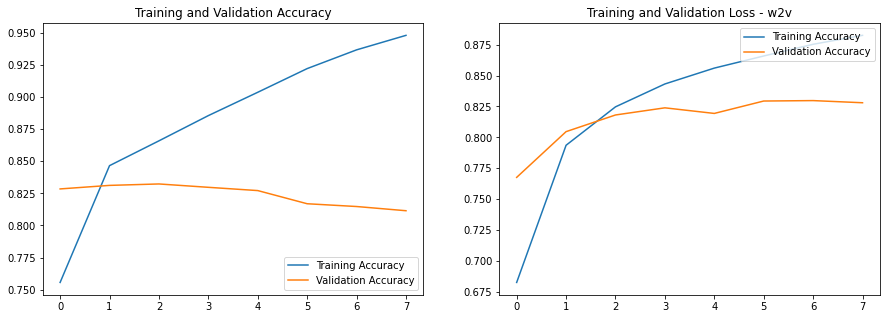

In [139]:
hist_plot2(CNN_hist, W2V_CNN_hist)

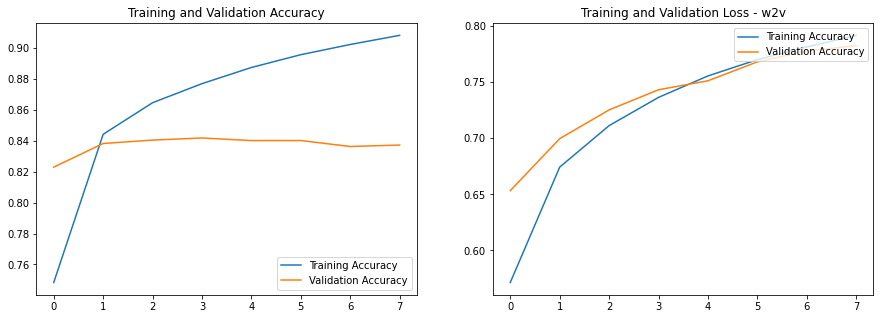

In [140]:
hist_plot2(GMP_hist, W2V_GMP_hist)

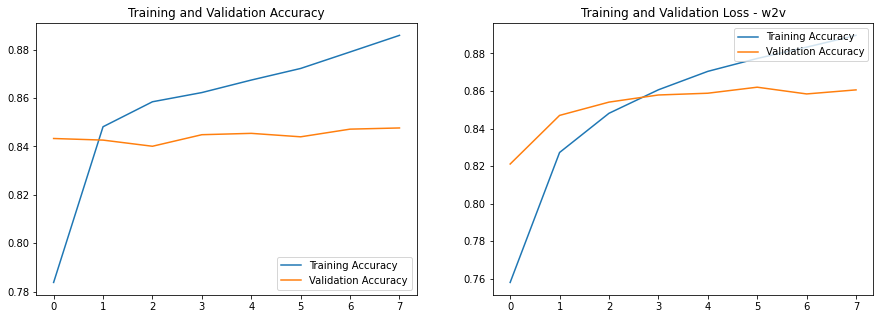

In [141]:
hist_plot2(LSTM_hist, W2V_LSTM_hist)

이격이 줄어들었다고는 하나,

실질적으로 정확도에서 유의미한 성능 개선이 있었다 할 수 있는 그래프는 4번째 LSTM 그래프라 볼 수 있다.

학습 종료시점의 검증 정확도만 비교한다면, 기대치 보다는 낮은 결과이지만,

W2V 적용 모델은 학습 반복과 약간의 규제등의 조정을 거친다면, 개선의 가능성이 더 있을것이라고 생각한다.

최종 결과를 표로 그려보면 다음과 같다.

|Model|Default|Word2Vec_ko|Variance|
|-----|-------|-----------|--------|
|RNN|83.06％|77.66％|▼5.40％|
|CNN|81.35％|82.22％|▲0.87％|
|GMP|83.05％|77.75％|▼5.03％|
|LSTM|84.50％|85.81％|▲1.31％|

전반적으로 5％ 이상의 상승을 예상하던 기대와 달리,

오히려 하락이 5％ 이상의 폭으로 떨어진 모델이 반이고,

상승한 모델은 1％ 전후의 폭으로 상승한 결과를 확인할 수 있었다.

다행스럽게도, 동일한 조건에서 LSTM 모델이 루브릭 목표 85％ 를 달성하였다.

마지막으로, 근소한 차이이지만, 준비한 모델중에 가장 정확도가 높았던 LSTM 모델을 이용하여,

리뷰의 긍정／부정 평가 예측값을 predict() 사용하여 확인 해 보겠다.

앞선 내용들은 대부분 눈에 보이지 않는 사전 작업들이고, 결과적으로 프로젝트의 목적은 바로 이 부분 때문이 아닐까 싶다.

네이버 영화리뷰 감성분석을 하는 프로젝트인데, 사실상 이 마지막 과정을 제외하면 대부분 상당히 지루하고 어려운 과정이었다.

물론 그 과정 도중에, Word2Vec 임베딩 적용 부분에서 잠깐 다루었던 비슷한 단어 찾기는 꽤 흥미로운 내용이라 재밌는 부분이었는데,

나머지 부분은 힘들고 뭘 하는건가 하는 생각이 든 사람이 나 말고도 많을것 같다, 는 개인적인 생각이다.

아무튼, 이 만들어진 모델로 실제 평점 댓글등을 넣고 돌려보는 과정은 제법 재미있다.

참고자료들에서는 이러한 결과를 확인하는 내용들이 있었는데, 이게 사실 프로젝트 수행 목표와, 루브릭 목표 모두 달성한 상황에서

굳이 필요는 없지만, 막상 넘어가려다가… 작사가 만들기 노드때는 이런 예측 결과를 내 보는 내용으로 마무리를 지었는데,

이번 노드는 그런게 없는 것 같아서 추가하기로 했다. 이 내용을 다루지 않다니 너무 섭섭해！

입력에 대해서는 모델 학습때와 마찬가지의 전처리 과정을 수행하여 predict() 의 입력으로 사용한다.

In [170]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 텍스트 스트링을 사전 인덱스 스트링으로 변환 하는 함수
## 기본적으로 load_data() 함수에 포함되어 있는 함수와 동일한 내용 이지만
## 딕셔너리에서 단어의 인덱스 값을 찾아 반환하는 내용을 고려하여
## else word_to_index[''] for word in wordlist] 를
##                     ▽
## else word_to_index['<UNK>'] for word in wordlist] 로 변경하였다.
def wordlist_to_indexlist(wordlist):
    return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

def sentiment_predict(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)    ## 한글 제외 필요없는 문자 제거
    print("불필요한 문자 제거：", text)
    text = tokenizer.morphs(text)    ## 토큰화
    print("토큰화：", text)
    text = [word for word in text if not word in stopwords]    ## 불용어 제거
    print("불용어 제거：", text)
    encoded = [wordlist_to_indexlist(text)]    ## 정수 인코딩
    print("정수 인코딩：", encoded)
    pad_new = pad_sequences(list(encoded), value=word_to_index["<PAD>"], padding="pre", maxlen=maxlen)    ## 패딩
    print("패딩：", pad_new, "pad_new.shape :", pad_new.shape)
    score = float(W2V_LSTM_model.predict(pad_new))    ## 예측
    print(score, type(score))
     
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

그리고, 진짜 네이버 영화 평점들에서 이 모델이 잘 만들어진 것인지 한번 둘러보자.

In [171]:
sentiment_predict("영화 보고 안구건조증이 치료되었습니다")

불필요한 문자 제거： 영화 보고 안구건조증이 치료되었습니다
토큰화： ['영화', '보', '고', '안구건조증', '이', '치료', '되', '었', '습니다']
불용어 제거： ['영화', '보', '고', '안구건조증', '치료', '되', '었', '습니다']
정수 인코딩： [[4, 9, 6, 2, 2979, 43, 16, 62]]
패딩： [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     4    9    6    2 2979   43   16   62]] pad_new.shape : (1, 36)
0.8378855586051941 <class 'float'>
83.79% 확률로 긍정 리뷰입니다.



In [172]:
sentiment_predict("꼭 가족이랑, 부모님이랑 함께 보세요 정말 감동적입니다")

불필요한 문자 제거： 꼭 가족이랑 부모님이랑 함께 보세요 정말 감동적입니다
토큰화： ['꼭', '가족', '이랑', '부모', '님', '이랑', '함께', '보', '세요', '정말', '감동', '적', '입니다']
불용어 제거： ['꼭', '가족', '이랑', '부모', '님', '이랑', '함께', '보', '세요', '정말', '감동', '적', '입니다']
정수 인코딩： [[193, 282, 303, 961, 149, 303, 462, 9, 205, 23, 72, 21, 124]]
패딩： [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 193 282 303 961 149 303 462   9 205  23  72  21 124]] pad_new.shape : (1, 36)
0.9957700371742249 <class 'float'>
99.58% 확률로 긍정 리뷰입니다.



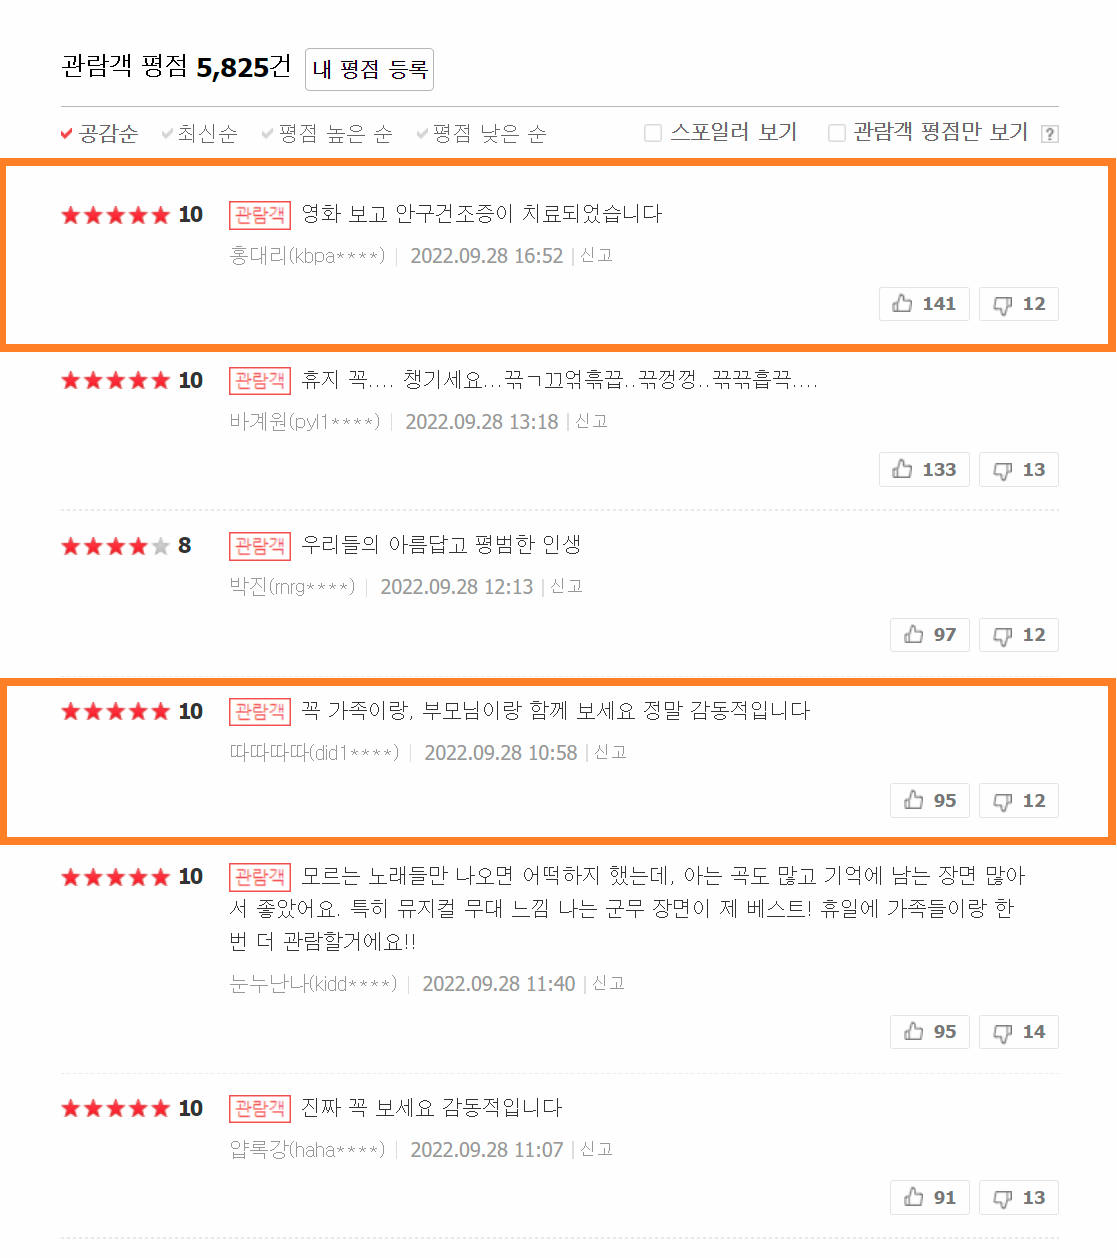

In [173]:
sentiment_predict("마지막 ㅈㄴ강렬하네...내가 왠만하면 공포영화도 잘보고 깜놀타이밍도 잘알고있다고 생각했는데 이건 방심할 틈을안주네 ㅋㅋㅋㅋ 오랜만에 공포영화다운 영화본거같음")

불필요한 문자 제거： 마지막 ㅈㄴ강렬하네내가 왠만하면 공포영화도 잘보고 깜놀타이밍도 잘알고있다고 생각했는데 이건 방심할 틈을안주네 ㅋㅋㅋㅋ 오랜만에 공포영화다운 영화본거같음
토큰화： ['마지막', 'ㅈ', 'ㄴ', '강렬', '하', '네', '내', '가', '왠만', '하', '면', '공포', '영화', '도', '잘', '보', '고', '깜놀', '타이밍', '도', '잘', '알', '고', '있', '다고', '생각', '했', '는데', '이건', '방심', '할', '틈', '을', '안', '주', '네', 'ㅋㅋ', 'ㅋㅋ', '오랜만', '에', '공포', '영화', '다운', '영화', '본', '거', '같', '음']
불용어 제거： ['마지막', 'ㅈ', 'ㄴ', '강렬', '하', '네', '내', '왠만', '하', '면', '공포', '영화', '보', '고', '깜놀', '타이밍', '알', '고', '있', '다고', '생각', '했', '는데', '이건', '방심', '할', '틈', '을', '안', '주', '네', 'ㅋㅋ', 'ㅋㅋ', '오랜만', '공포', '영화', '다운', '영화', '본', '거', '같', '음']
정수 인코딩： [[113, 1028, 951, 1405, 7, 37, 50, 1005, 7, 44, 208, 4, 9, 6, 2991, 4981, 77, 6, 12, 153, 65, 35, 18, 117, 2, 56, 1716, 8, 22, 49, 37, 45, 45, 377, 208, 4, 562, 4, 75, 39, 31, 26]]
패딩： [[  50 1005    7   44  208    4    9    6 2991 4981   77    6   12  153
    65   35   18  117    2   56 1716    8   22   49   37   45   45  377
   208    4  562    4   75   39   31   26]] pad_new.shape

In [174]:
sentiment_predict(" 주인공이 연기를 진짜 미친듯이 잘한다.. CG도 실감나고 긴장감도 짱짱하고 정말 잘 만든 영화!! 다 보고 계단 내려오는데 다리 힘 풀려서 넘어질 뻔했음 ㅋㅋ ㅜ")

불필요한 문자 제거：  주인공이 연기를 진짜 미친듯이 잘한다 도 실감나고 긴장감도 짱짱하고 정말 잘 만든 영화 다 보고 계단 내려오는데 다리 힘 풀려서 넘어질 뻔했음 ㅋㅋ ㅜ
토큰화： ['주인공', '이', '연기', '를', '진짜', '미친', '듯이', '잘', '한다', '도', '실감', '나', '고', '긴장감', '도', '짱짱', '하', '고', '정말', '잘', '만든', '영화', '다', '보', '고', '계단', '내려오', '는데', '다리', '힘', '풀려서', '넘어질', '뻔', '했', '음', 'ㅋㅋ', 'ㅜ']
불용어 제거： ['주인공', '연기', '진짜', '미친', '듯이', '한다', '실감', '나', '고', '긴장감', '짱짱', '하', '고', '정말', '만든', '영화', '다', '보', '고', '계단', '내려오', '는데', '다리', '힘', '풀려서', '넘어질', '뻔', '했', '음', 'ㅋㅋ', 'ㅜ']
정수 인코딩： [[172, 47, 33, 575, 1216, 186, 2561, 15, 6, 350, 892, 7, 6, 23, 178, 4, 5, 9, 6, 4825, 2, 18, 2303, 611, 2, 2, 403, 35, 26, 45, 894]]
패딩： [[   0    0    0    0    0  172   47   33  575 1216  186 2561   15    6
   350  892    7    6   23  178    4    5    9    6 4825    2   18 2303
   611    2    2  403   35   26   45  894]] pad_new.shape : (1, 36)
0.9941113591194153 <class 'float'>
99.41% 확률로 긍정 리뷰입니다.



In [175]:
sentiment_predict("진짜 26년 살면서 이 영화가 제일 무서웠다")

불필요한 문자 제거： 진짜 년 살면서 이 영화가 제일 무서웠다
토큰화： ['진짜', '년', '살', '면서', '이', '영화', '가', '제일', '무서웠', '다']
불용어 제거： ['진짜', '년', '살', '면서', '영화', '제일', '무서웠', '다']
정수 인코딩： [[33, 92, 180, 102, 4, 369, 1471, 5]]
패딩： [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    33   92  180  102    4  369 1471    5]] pad_new.shape : (1, 36)
0.9247817397117615 <class 'float'>
92.48% 확률로 긍정 리뷰입니다.



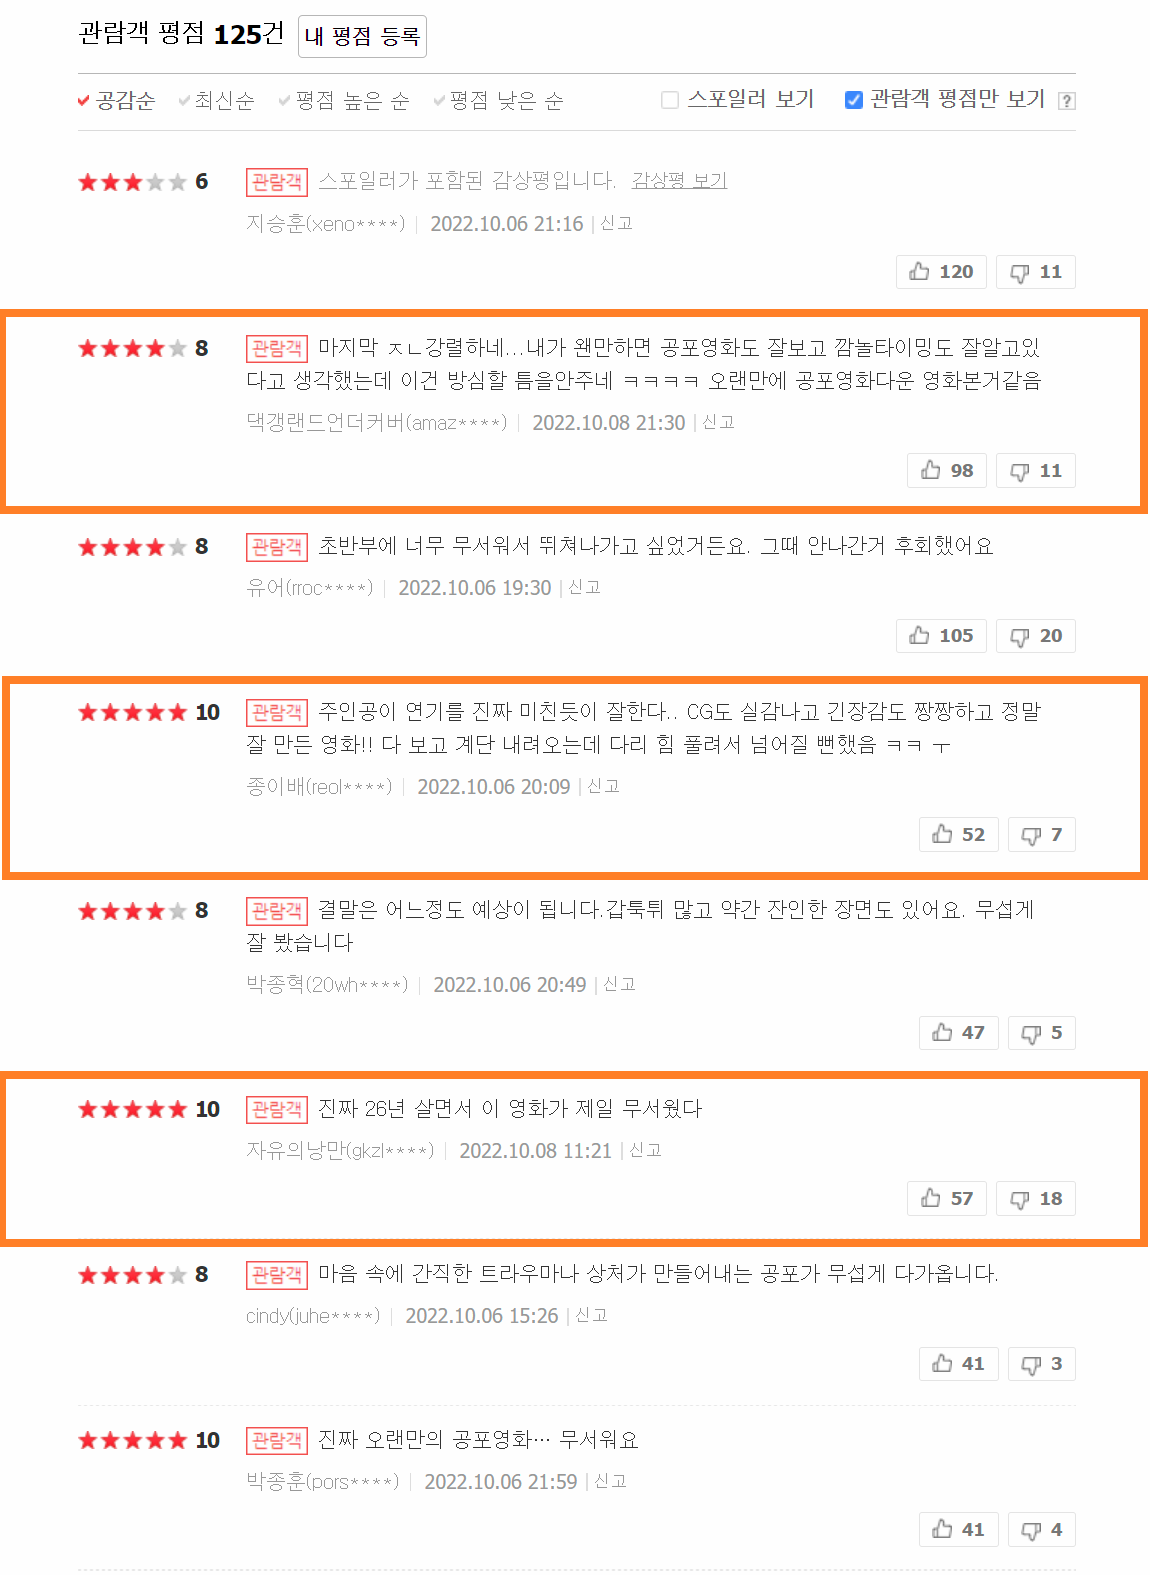

In [176]:
sentiment_predict(" 늑대사냥 볼바에 그 돈으로 더위사냥 여러개 사드세요")

불필요한 문자 제거：  늑대사냥 볼바에 그 돈으로 더위사냥 여러개 사드세요
토큰화： ['늑대', '사냥', '볼', '바', '에', '그', '돈', '으로', '더위', '사냥', '여러', '개', '사', '드세요']
불용어 제거： ['늑대', '사냥', '볼', '바', '그', '돈', '더위', '사냥', '여러', '개', '사', '드세요']
정수 인코딩： [[2709, 3561, 81, 310, 68, 138, 2, 3561, 728, 118, 380, 2]]
패딩： [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 2709 3561   81  310
    68  138    2 3561  728  118  380    2]] pad_new.shape : (1, 36)
0.0694623664021492 <class 'float'>
93.05% 확률로 부정 리뷰입니다.



In [177]:
sentiment_predict("근본없는 내용으로 두시간은 너무 했다 시간사냥")

불필요한 문자 제거： 근본없는 내용으로 두시간은 너무 했다 시간사냥
토큰화： ['근본', '없', '는', '내용', '으로', '두', '시간', '은', '너무', '했', '다', '시간', '사냥']
불용어 제거： ['근본', '없', '내용', '두', '시간', '너무', '했', '다', '시간', '사냥']
정수 인코딩： [[5303, 13, 79, 176, 87, 19, 35, 5, 87, 3561]]
패딩： [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 5303   13
    79  176   87   19   35    5   87 3561]] pad_new.shape : (1, 36)
0.0005353366723284125 <class 'float'>
99.95% 확률로 부정 리뷰입니다.



In [178]:
sentiment_predict("최악의 낚시 영화. 허무한 sf물")

불필요한 문자 제거： 최악의 낚시 영화 허무한 물
토큰화： ['최악', '의', '낚시', '영화', '허무', '한', '물']
불용어 제거： ['최악', '낚시', '영화', '허무', '물']
정수 인코딩： [[147, 1935, 4, 737, 330]]
패딩： [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  147 1935    4  737  330]] pad_new.shape : (1, 36)
5.5060496379155666e-05 <class 'float'>
99.99% 확률로 부정 리뷰입니다.



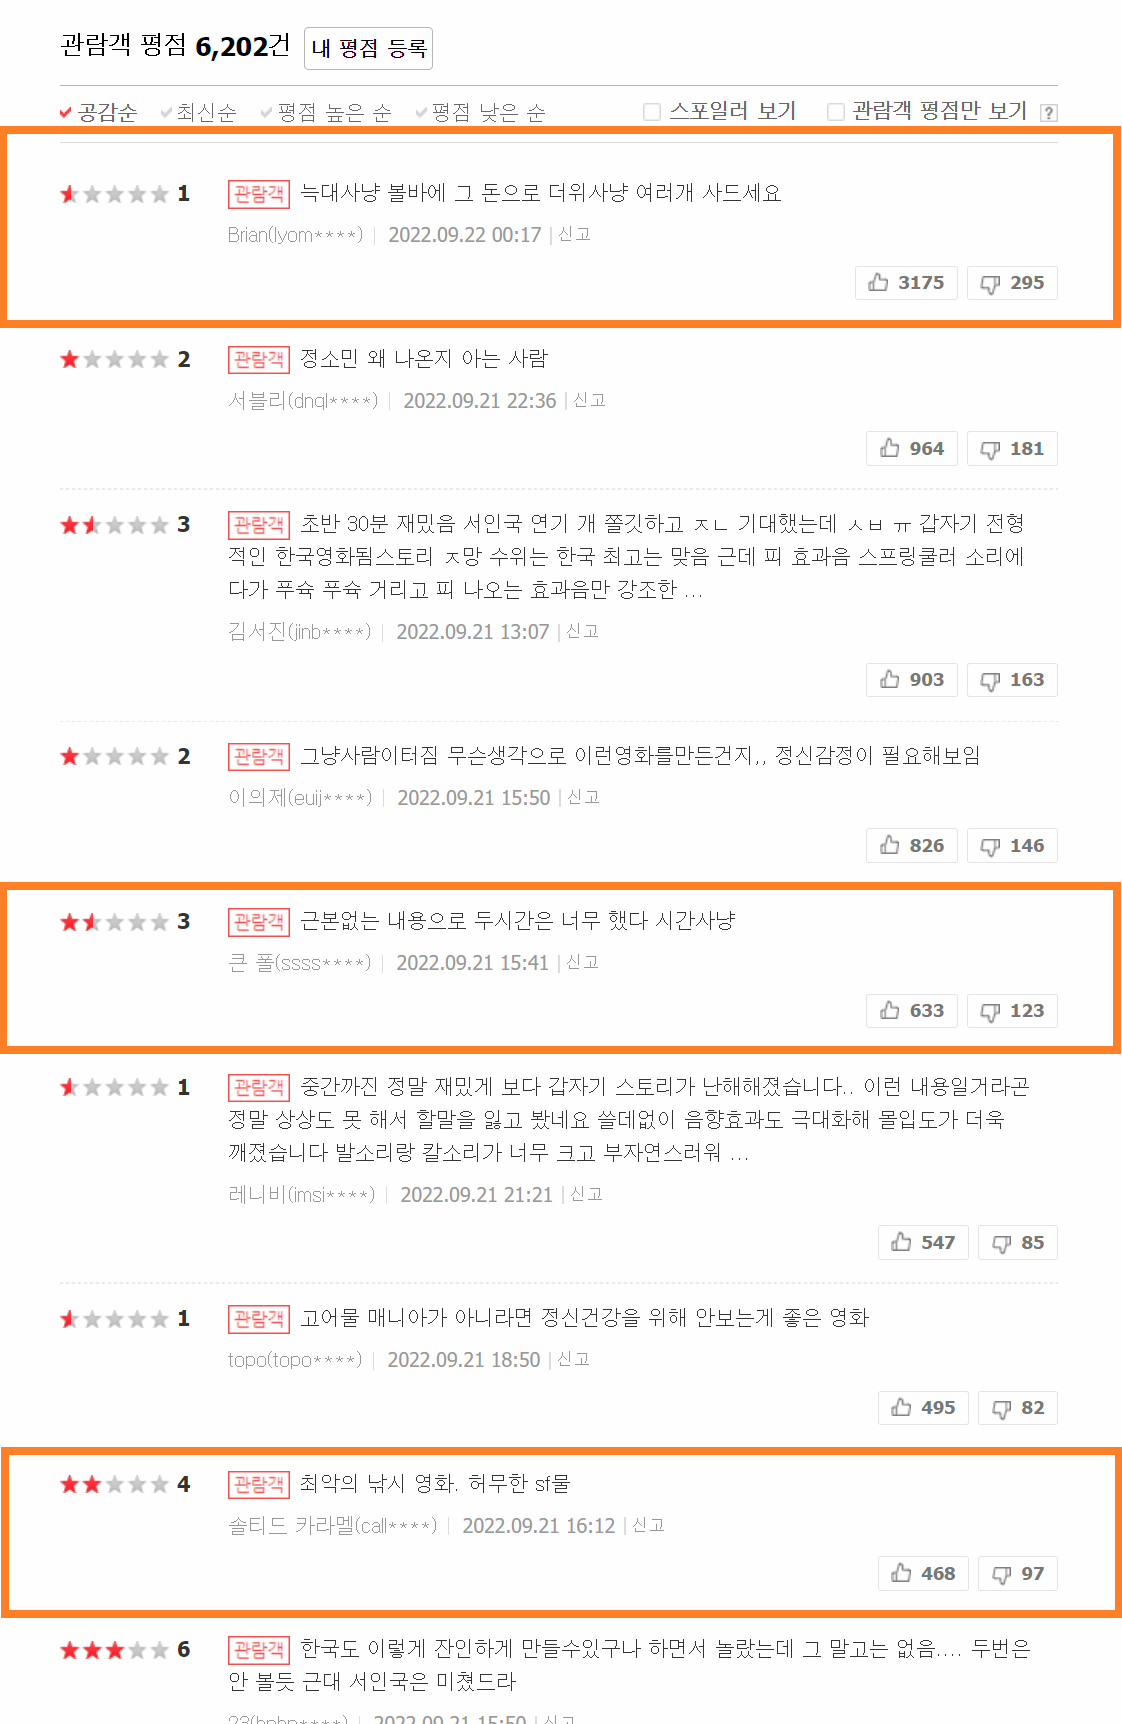

### 이건 제법 재미있다…！

<hr>

## ■ 프로젝트 회고

#### 1) 이번 프로젝트에서 '어려웠던 점'

환경문제로 고생을 많이 했고 시간낭비도 많이 하며 정신적으로 고통을 많이 받았다.

라이브러리 설치와 각종 호환성 문제로 스트레스를 많이 받았다.

프로젝트중에 답답하고 짜증났던 부분의 반을 차지한다.

지난 프로젝트들에서도 그랬지만, 이건 상당히 민감한 문제 같다.

기본 셋팅에 관한 설명이 절실하게 필요한데…

노드에서 최소한 쉘 스크립트 설명하는 것 정도라도,

이 환경 셋팅에 관한 부분도 다루었더라면 좋았을 것 같은데 말이다.

그 다음으로는 원인을 알 수 없는 오류를 겪은것…

장문규 교육생의 어드바이스를 따라 필터값을 조정하고 넘어가기는 했는데,

사실 몇번이고 실행했던게, 갑자기 안되니까 이해가 안되는 일들이 많은것 같다.

#### 2) 프로젝트를 진행하면서 본인이 '학습한 내용'

이번 프로젝트 노드에서 자연어 처리 모델을 여러개 적용해 봤던것이 가장 큰 수확이라고 생각한다.

각각의 소주제에 해당하는 내용과 그에 관한 실습을 통해

텍스트의 숫자 인코딩, 임베딩 레이어, 시퀀스 데이터 각 모델들에 대해서 학습하였다.

전반적으로 지난 노드대비 양적인 측면에서는 더 많은 주제를 다룬것 같다.

지난 자연어 처리 프로젝트에서 사용했던 토큰화를 조금 변형해서 실습해보고,

Word2Vec_ko 모델도 가져다가 사용하는 법도 실습했다. 

사전학습 모델의 효과를 가시적으로 경험하지는 못했지만…

이전에 자연어 처리 파트 프로젝트 (작사가) 진행하면서 내성이 생겼는지,

그냥 봤더라면 어지러운 내용이었을 것 같았지만, 구성이나 설명이 나쁘지 않아서,

프로젝트의 흐름을 전반적으로 따라가면서 이야기를 따라가듯 실습하며 학습할 수 있었던 것 같다.

#### 3) 프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

이번 프로젝트를 진행하면서 단어 사전을 만들고 토큰화를 하고,

그것들을 정수화 해서 신경망에 넣어서 여러개의 모델들로 학습을 시키고,

최종적으로 이것들로 감정분석을 한다니!

이러한 과정들을 살펴보면서 어떻게 딥러닝으로 이런게 가능한지 실습을 해 볼 수 있었다.

여러가지 모델들로도 텍스트를 통해, 어느정도 그 작성자의 감정을 분류할 수 있다는 것이 흥미로운 요소였다.

프로젝트 노드의 여러 링크들을 통해 이것들이 실제로 활용되는 사례를 보면서

자연어 처리 기법이 우리들이 모르는 분야에서 이렇게 많이 활용되고 있다는 것을 알 수 있었다.

이번 프로젝트는 그런 점이 제일 크게 와닿았다.

모호한점은, 유사한 단어 검색 부분이다.

한글 Word2Vec 모델을 가져다 사용하는 과정에서 유사한 단어 찾아보는 부분이 나오는데,

임베딩에 적용하기 전의 모델과 비교하면, 유사한 단어 결과가 확연한 차이를 보인다.

그렇다면, 감정분석에 있어서 유사한 단어를 저렇게 가져온다면, 분명 도움이 될 거라고 생각했는데,

실제로는 의미있는 정확도 향상 결과를 확인하지 못했다.

유사한 단어라면 어느정도 비슷한 감정들을 공유할 거라 생각했는데, 왜 그런지 궁금함이 남아있다.

#### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

루브릭 평가 지표를 맞추기 위해서라기 보다는, 프로젝트를 온전히 마치고자 이전의 노드를 참고자료로 활용을 하는 과정에서

LSTM 모델을 추가하게 되었는데, 전혀 예상하지 못했던 이 LSTM 덕에 루브릭 평가지표는 큰 고생없이 달성할 수 있었다.

나머지 루브릭 조건은 대부분 본 프로젝트 노드의 실습 부분에서 다루어진 내용들이 대부분이다.

다만 프로젝트의 기본 뼈대를 안정적으로 갖추기 까지가 힘들었다. 전처리부터 여러가지로 손이 많이 가는 과정이 많았다.

중요한 부분은 대부분 실습 과정을 그대로 적용 가능했는데, 전반적인 이해를 위해서 여러가지 추가적으로 처리를 해두었다.

처음에 틀을 잡고 나서, 이해가 안되어서 다시 뒤엎고, 코드들을 다시 작성하고 정리를 병행하면서, 

흐름을 따라 실행 하며 이해를 할 수 있게 구성했다. 그 과정에서 전반적인 내용을 정리할 수 있었다.

#### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

루브릭 평가지표를 달성하여, 별도의 튜닝(규제 적용 등)은 수행하지 않았지만, 달성하지 못했다면 전반적으로 조정을 할 생각을 갖고 있었다.

임베딩 레이어에 Word2Vec_ko 모델을 적용하기 전의 기본형 모델들의 경우, 프로젝트 뒤엎고 다시 하기 전에, 학습시에 정확도 수치는

대략 82~84％는 충분히 끌어낼 수 있음을 확인 했었고, 훈련 반복 10회로 파라메터 튜닝을 통해 85.06％ 가량의 정확도도 확인했었다.

튜닝을 수행하고, 사전크기를 늘리거나 하는 등의 전처리에 조금 손을 댄다면, 

루브릭 달성은 충분히 될 것 같다는 가능성을 보았기에, 어지간해서는 달성에 어렵지는 않을 것 같다는 생각이다.

다만, 루브릭 평가지표 외에 정상적으로 일단 프로젝트는 마쳐놓은 상태가 우선인것 같다.

프로젝트 내용이 정상적으로 수행하고 결과를 확인하는 첫번째 루브릭 조건이 안된다면, 나머지는 자연스럽게 아웃이 될 것이다.

85％ 정확도나 이런 것 보다 제일 중요한게, 이 프로젝트의 내용을 이해했는가의 여부가

기본적인 프로젝트 완료에 제일 중요한 요소이며, 3개의 루브릭 조건중에 제일 우선시 해야 하는 과제로 생각된다.

#### 6) 자기 다짐

솔직히 프로젝트 노드는 복잡하기는 했지만, 이전 노드들에서 학습한 내용들을 참고하면서,

추가로 미흡한 부분을 채워나가다보니 역대급으로 어렵다거나 하진 않았다고 생각한다.

다만 프로젝트를 진행하는 과정에서 상당히 지루한 느낌을 많이 받았다.

문자 토큰화 하고 신경망 쌓고 학습 시키고 정확도 확인하고 시각화 하는 과정은…

큰 흥미가 생기질 않았고, 어려운 문제를 해결하며 앞으로 나가는 것을 반복하는 느낌만 들었다.

그 와중에서 임베딩 레이어에서 비슷한 단어들을 찾는 과정은, 간단했지만 흥미로운 주제였다.

다만 그게 깊게 들어갈만한 내용이 아니어서, 진짜 짧게 끝나버렸다.

긴 시간을 들여서 프로젝트 완성하고 나니 뭔가 끝맺음이 밋밋해서,

재미삼아 없는 시간을 더 투자해서 모델로 예측 결과까지 확인을 해 보았는데,

그건 그거대로 또 생각보다 잘 돌아가는거 같아 끝부분에 가서 잠깐 재밌었다.

아무렴, 프로젝트 수행 과정에서 부족한 점도 많이 느꼈고,

추가적으로 초반에 환경설정에서 고생을 정말 많이 해서 라이브러리 셋팅등의 각종 환경설정들도

공부할 필요가 있겠다는 생각을 했다.

…했는데…, 대체 넘파이랑 판다스 공부한다고 하고 공부 할 시간도 없고 바쁜데 언제할껀가？

계속 한숨쉬면서 진행했던 프로젝트이지만, 결과 보니 또 마무리가 괜찮게 된 것 같아서,

소소한 재미를 느낄 수 있었다. 그렇다고 해서 NLP 가 갑자기 좋아졌다거나 한 건 아니지만.

<hr>

## ◎ Reference

 - (AIFFEL) Exploration Project Node 06. 작사가 인공지능 만들기

 - (AIFFEL) Exploration Project Node 08. 영화리뷰 텍스트 감성분석하기

 - [임베딩 레이어를 통해 word가 벡터화되는 과정] [07. 파이토치(PyTorch)의 nn.Embedding()](https://wikidocs.net/64779)

 - [1D CNN] [2) 자연어 처리를 위한 1D CNN(1D Convolutional Neural Networks)] (https://wikidocs.net/80437)

 - [Word2Vec] [Storing and loading models](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#storing-and-loading-models)

 - [Word2Vec] [models.keyedvectors](https://radimrehurek.com/gensim/models/keyedvectors.html)

 - (TensorFlow) TensorFlow v2.10.0 API - [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)

 - [BiLSTM을 활용한 감정 분석](https://velog.io/@changhtun1/BiLSTM%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B0%90%EC%A0%95-%EB%B6%84%EC%84%9D)

 - [실험용 영화 평점 자료] [Naver 영화 홈](https://movie.naver.com/)

<hr>

이번 프로젝트에서 알 수 없는 트러블을 겪었을 때 어드바이스를 주신, 교육생 장문규님께 고맙습니다라는 말을 전하며, 마무리 짓도록 하겠습니다.